## Análisis de la Información emisores

 -	Por Región (Latam_EU_USA).
 -	Por Industria.
 -  Por Región vs Ind
 
 #  Son 16 pasos indicados que se deben verificar antes de ejecutar

# 1

# Hacer una copia de este, para el mes correspondiente

# 2
# Esta ejecución tendra el nombre de "**Analisis_Emisores_Reg_Ind**" 
 
Nota: El fichero del mes anterior no debe tener el mismo el mismo nombre, al fichero generado se le cambia o agregar ej: _Abril, para no duplicarlo y la ejecución funcione  

Ruta donde se va alojar: 

`X:\INVDESPRO\INVESTIGACION\Fondos éticos\3. DATASETS\04_Datos Clarity\01_Equities_feed\05_Analisis_DF\Analisis_Emisores_Reg_Ind`

# 3

# Ruta de los DF a utilizar con OW, subir o eliminar lo necesario

**RUTA: `X:\INVDESPRO\INVESTIGACION\Fondos éticos\3. DATASETS\04_Datos Clarity\01_Equities_feed\DF_para_python`**

**Nota** `PASAR SIEMPRE LOS DF CON OW APLICADOS A  CSV (SI NO ESTAN HECHOS) con delimitador ";"`


### Ahora van de Junio 2022 a Junio 2023, nota: sin enero 2023 

In [1]:
#Librerías
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install faker 
import seaborn as sns
import matplotlib.ticker as ticker
import os


"C:\Program" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
# importar ficheros csv 
import pandas as pd
import os

# lista para almacenar los dataframes
dataframes_v = []

#ruta a la carpeta que contiene los archivos CSV ';'
path = 'X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/DF_para_python'


for file in os.listdir(path):
    if file.endswith('.csv'):
        #pasar el csv a un DataFrame
        try:
            df = pd.read_csv(os.path.join(path, file), delimiter=',')
        except pd.errors.ParserError:
            df = pd.read_csv(os.path.join(path, file), delimiter=';')
              
        # Extraer el nombre del archivo CSV
            filename = os.path.basename(file)
            df_name = os.path.splitext(filename)[0]

#Asignar el nombre del archivo CSV como el nombre del DataFrame
            df.name = df_name
            globals()[df_name] = df
            dataframes_v.append(globals()[df_name])

C:\Users\n629352\AppData\Local\Temp\ipykernel_10008\662754047.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), delimiter=';')
C:\Users\n629352\AppData\Local\Temp\ipykernel_10008\662754047.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), delimiter=';')
C:\Users\n629352\AppData\Local\Temp\ipykernel_10008\662754047.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), delimiter=';')
C:\Users\n629352\AppData\Local\Temp\ipykernel_10008\662754047.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), delimiter=';')


In [3]:
#comprobar si están todos los csv de la carpeta 'DF_para_python'
for i, df in enumerate(dataframes_v):
    #nombre del dataframe
    print(f"Nombre del dataframe {i+1}: {os.path.splitext(os.path.basename(df.name))[0]}")
    #info df
    print(f"Cantidad de filas y columnas: {df.shape[0]} filas, {df.shape[1]} columnas")
    #vista previa
    print(f"Vista previa de las primeras 5 filas:\n{df.head()}\n")

Nombre del dataframe 1: 202206_DF_Jun (Datos cierre Mayo)
Cantidad de filas y columnas: 835136 filas, 254 columnas
Vista previa de las primeras 5 filas:
           isin instrument_type                 issuer_name  \
0  AEA003001012          EQUITY             Air Arabia PJSC   
1  AEB000101011          EQUITY        Bank of Sharjah PJSC   
2  AEE000501016          EQUITY  Emirates Islamic Bank PJSC   
3  AEE001501015          EQUITY            Emaar Malls PJSC   
4  AEU000201019          EQUITY  Union Cement Company PrJSC   

         issuer_country  gics2_industry            region company_inheriting  \
0  United Arab Emirates  Transportation  Emerging Markets              FALSO   
1  United Arab Emirates           Banks  Emerging Markets              FALSO   
2  United Arab Emirates           Banks  Emerging Markets          VERDADERO   
3  United Arab Emirates     Real Estate  Emerging Markets              FALSO   
4  United Arab Emirates       Materials  Emerging Markets          V

## Agregar los Nuevos DF para copia y a la LISTA ''dataframe" 

In [4]:
#lista para almacenar los dataframes renombrados, copia para su uso
dataframes = []

#renombrarlos
for i, df in enumerate(dataframes_v):
    new_df = df.copy()
    new_df.name = f"DF_{i+1}"
    # Agregar el dataframe renombrado a la lista
    dataframes.append(new_df)

In [5]:
# DF_1 = JUN 2022..... DF_10= ABRIL 2023

# se ha creado la lista dataframes = [DF_1, DF_2,DF_3,DF_4,DF_5,DF_6,DF_7,DF_8,DF_9, DF_10]

#verificar, cantidad de DF y su nuevo nombre 
for i, df in enumerate(dataframes):
    print(f"Nombre del dataframe {i+1}: {os.path.splitext(os.path.basename(df.name))[0]}")
    print(f"Cantidad de filas y columnas: {df.shape[0]} filas, {df.shape[1]} columnas")

Nombre del dataframe 1: DF_1
Cantidad de filas y columnas: 835136 filas, 254 columnas
Nombre del dataframe 2: DF_2
Cantidad de filas y columnas: 834522 filas, 254 columnas
Nombre del dataframe 3: DF_3
Cantidad de filas y columnas: 877384 filas, 254 columnas
Nombre del dataframe 4: DF_4
Cantidad de filas y columnas: 877349 filas, 254 columnas
Nombre del dataframe 5: DF_5
Cantidad de filas y columnas: 890443 filas, 254 columnas
Nombre del dataframe 6: DF_6
Cantidad de filas y columnas: 890442 filas, 254 columnas
Nombre del dataframe 7: DF_7
Cantidad de filas y columnas: 890349 filas, 256 columnas
Nombre del dataframe 8: DF_8
Cantidad de filas y columnas: 850164 filas, 254 columnas
Nombre del dataframe 9: DF_9
Cantidad de filas y columnas: 1010303 filas, 254 columnas
Nombre del dataframe 10: DF_10
Cantidad de filas y columnas: 1011719 filas, 254 columnas
Nombre del dataframe 11: DF_11
Cantidad de filas y columnas: 1021184 filas, 254 columnas
Nombre del dataframe 12: DF_12
Cantidad de fila

In [6]:
#Sustituir ',','.'.... todos quedan en '.'

for df in  dataframes:
    df['gics2_industry'] = df['gics2_industry'].replace(',','.',regex=True)

In [7]:
#Comprobación
for df in  dataframes:
    print('Valores únicos para gics2_industry', df.name, ':')
    print(df['gics2_industry'].unique())
    print(df['gics2_industry'].value_counts())
    print('Valores únicos para region', df.name, ':')
    print(df['region'].unique())

Valores únicos para gics2_industry DF_1 :
['Transportation' 'Banks' 'Real Estate' 'Materials' nan
 'Food & Staples Retailing' 'Software & Services'
 'Semiconductors & Semiconductor Equipment'
 'Pharmaceuticals. Biotechnology & Life Sciences' 'Utilities'
 'Telecommunication Services' 'Food. Beverage & Tobacco'
 'Consumer Durables & Apparel' 'Automobiles & Components'
 'Commercial & Professional Services' 'Consumer Services'
 'Media & Entertainment' 'Diversified Financials' 'Energy'
 'Health Care Equipment & Services' 'Insurance' 'Retailing'
 'Capital Goods' 'Technology Hardware & Equipment'
 'Household & Personal Products']
Banks                                             306183
Diversified Financials                            187610
Utilities                                          10150
Capital Goods                                       9009
Real Estate                                         8220
Materials                                           8123
Energy                     

# REGIONES

## LATAM

# 4 
# En este paso se debe modificar los meses en  " month_name" y "final_df_Latam.columns "

In [20]:
# Diccionario para almacenar los dataframes filtrados
filtered_dfs_latam = {}


for i, df in enumerate(dataframes):
    # Seleccionar las columnas ClarityID y region
    df = df[['ClarityID', 'region']]
    # Filtrar por region 
    df = df[df['region'] == 'Latam']
    # Quitar duplicados en cada dataframe
    df = df.drop_duplicates()
    # Agregar el dataframe filtrado al diccionario, con el nombre correspondiente 
    
    # Nota se que van de JUN A ABRIL--> ''AGREGAR Y/O QUITAR NOMBRE''
    
    month_name = ['oct-22','nov-22', 'dic-22', 'feb_23', 'mar_23', 'abr_23', 'may_23', 'jun_23', 'jul_23', 'ago_23', 'sep_23', 'oct_23'][i]
    filtered_dfs_latam[month_name] = df[['ClarityID']]

# Unir los dataframes 
final_df_Latam = pd.concat(filtered_dfs_latam, axis=1)

# Renombrar las columnas en el dataframe final ''AGREGAR O QUITAR NOMBRE''
final_df_Latam.columns = ['oct-22','nov-22', 'dic-22', 'feb_23', 'mar_23', 'abr_23', 'may_23', 'jun_23', 'jul_23', 'ago_23', 'sep_23', 'oct_23']


print(final_df_Latam)

            jun_2022  jul_2022  agosto_2022  sep_2022     oct_2022  \
23          105127.0       NaN          NaN       NaN     105127.0   
24          224789.0       NaN          NaN       NaN     224789.0   
25       152735174.0       NaN          NaN       NaN  152735174.0   
51       162216198.0       NaN          NaN       NaN  162216198.0   
52          131954.0       NaN          NaN       NaN     131954.0   
...              ...       ...          ...       ...          ...   
1065189          NaN       NaN          NaN       NaN          NaN   
1065651          NaN       NaN          NaN       NaN          NaN   
1074699          NaN       NaN          NaN       NaN          NaN   
1074707          NaN       NaN          NaN       NaN          NaN   
1075203          NaN       NaN          NaN       NaN          NaN   

            nov_2022     dic_2022  feb_2023  marzo_2023  abril_2023  \
23          105127.0     105127.0       NaN         NaN         NaN   
24          22478

In [21]:
final_df_Latam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18714 entries, 23 to 1075203
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   jun_2022     1557 non-null   float64
 1   jul_2022     1555 non-null   float64
 2   agosto_2022  1554 non-null   float64
 3   sep_2022     1550 non-null   float64
 4   oct_2022     1560 non-null   float64
 5   nov_2022     1560 non-null   float64
 6   dic_2022     1557 non-null   float64
 7   feb_2023     1572 non-null   float64
 8   marzo_2023   1706 non-null   float64
 9   abril_2023   1706 non-null   float64
 10  mayo_2023    1703 non-null   float64
 11  jun_2023     1755 non-null   float64
dtypes: float64(12)
memory usage: 1.9 MB


In [22]:
#Cambiar datos a int

for col in final_df_Latam.columns:
    # si la columna es de tipo "object" o "float"
    if final_df_Latam[col].dtype == 'float':
        # convertir la columna a tipo "int", mantener los valores "NA" como "NaN"
        final_df_Latam[col] = pd.to_numeric(final_df_Latam[col], errors='coerce').astype('Int64')
        
print(final_df_Latam)

          jun_2022  jul_2022  agosto_2022  sep_2022   oct_2022   nov_2022  \
23          105127      <NA>         <NA>      <NA>     105127     105127   
24          224789      <NA>         <NA>      <NA>     224789     224789   
25       152735174      <NA>         <NA>      <NA>  152735174  152735174   
51       162216198      <NA>         <NA>      <NA>  162216198  162216198   
52          131954      <NA>         <NA>      <NA>     131954     131954   
...            ...       ...          ...       ...        ...        ...   
1065189       <NA>      <NA>         <NA>      <NA>       <NA>       <NA>   
1065651       <NA>      <NA>         <NA>      <NA>       <NA>       <NA>   
1074699       <NA>      <NA>         <NA>      <NA>       <NA>       <NA>   
1074707       <NA>      <NA>         <NA>      <NA>       <NA>       <NA>   
1075203       <NA>      <NA>         <NA>      <NA>       <NA>       <NA>   

          dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023   jun_2023 

In [23]:
final_df_Latam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18714 entries, 23 to 1075203
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     1557 non-null   Int64
 1   jul_2022     1555 non-null   Int64
 2   agosto_2022  1554 non-null   Int64
 3   sep_2022     1550 non-null   Int64
 4   oct_2022     1560 non-null   Int64
 5   nov_2022     1560 non-null   Int64
 6   dic_2022     1557 non-null   Int64
 7   feb_2023     1572 non-null   Int64
 8   marzo_2023   1706 non-null   Int64
 9   abril_2023   1706 non-null   Int64
 10  mayo_2023    1703 non-null   Int64
 11  jun_2023     1755 non-null   Int64
dtypes: Int64(12)
memory usage: 2.1 MB


# Europe

# 5 
# En este paso se debe modificar los meses en  " month_name" y "final_df_EU.columns "

In [24]:
# Diccionario  para almacenar los dataframes filtrados
filtered_dfs = {}


for i, df in enumerate(dataframes):
    # Seleccionar las columnas ClarityID y region
    df = df[['ClarityID', 'region']]
    # Filtrar por region
    df = df[df['region'] == 'Europe']
    # Quitar duplicados 
    df = df.drop_duplicates()
    
    # Nota se que van de JUN A ABRIL--> ''AGREGAR Y/O QUITAR NOMBRE''
    
    month_name = ['oct-22','nov-22', 'dic-22', 'feb_23', 'mar_23', 'abr_23', 'may_23', 'jun_23', 'jul_23', 'ago_23', 'sep_23', 'oct_23'][i]
    filtered_dfs[month_name] = df[['ClarityID']]

# Unir los dataframes
final_df_EU = pd.concat(filtered_dfs, axis=1)

# Renombrar las columnas en el dataframe final ''AGREGAR O QUITAR NOMBRE''
final_df_EU.columns = ['oct-22','nov-22', 'dic-22', 'feb_23', 'mar_23', 'abr_23', 'may_23', 'jun_23', 'jul_23', 'ago_23', 'sep_23', 'oct_23']


print(final_df_EU)

         jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
16        15521.0       NaN          NaN       NaN   15521.0   15521.0   
17       130578.0       NaN          NaN       NaN  130578.0  130578.0   
53       166759.0       NaN          NaN       NaN  166759.0  166759.0   
54       166751.0       NaN          NaN       NaN  166751.0  166751.0   
56       166865.0       NaN          NaN       NaN  166865.0  166865.0   
...           ...       ...          ...       ...       ...       ...   
1065474       NaN       NaN          NaN       NaN       NaN       NaN   
1065584       NaN       NaN          NaN       NaN       NaN       NaN   
1065641       NaN       NaN          NaN       NaN       NaN       NaN   
1075121       NaN       NaN          NaN       NaN       NaN       NaN   
1075285       NaN       NaN          NaN       NaN       NaN       NaN   

         dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023     jun_2023  
16        15521.0       NaN      

In [25]:
final_df_EU.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92730 entries, 16 to 1075285
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   jun_2022     8238 non-null   float64
 1   jul_2022     8211 non-null   float64
 2   agosto_2022  8220 non-null   float64
 3   sep_2022     8218 non-null   float64
 4   oct_2022     8273 non-null   float64
 5   nov_2022     8273 non-null   float64
 6   dic_2022     8270 non-null   float64
 7   feb_2023     8390 non-null   float64
 8   marzo_2023   8902 non-null   float64
 9   abril_2023   8914 non-null   float64
 10  mayo_2023    8928 non-null   float64
 11  jun_2023     9273 non-null   float64
dtypes: float64(12)
memory usage: 9.2 MB


In [26]:
#Cambiar datos a int

for col in final_df_EU.columns:
    # si la columna es de tipo "object" "float"
    if final_df_EU[col].dtype == 'float':
        # convertir la columna a tipo "int", manteniendo los valores "NA" como "NaN"
        final_df_EU[col] = pd.to_numeric(final_df_EU[col], errors='coerce').astype('Int64')
        
print(final_df_EU)

         jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
16          15521      <NA>         <NA>      <NA>     15521     15521   
17         130578      <NA>         <NA>      <NA>    130578    130578   
53         166759      <NA>         <NA>      <NA>    166759    166759   
54         166751      <NA>         <NA>      <NA>    166751    166751   
56         166865      <NA>         <NA>      <NA>    166865    166865   
...           ...       ...          ...       ...       ...       ...   
1065474      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
1065584      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
1065641      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
1075121      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
1075285      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   

         dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023   jun_2023  
16          15521      <NA>        

In [27]:
final_df_EU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92730 entries, 16 to 1075285
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     8238 non-null   Int64
 1   jul_2022     8211 non-null   Int64
 2   agosto_2022  8220 non-null   Int64
 3   sep_2022     8218 non-null   Int64
 4   oct_2022     8273 non-null   Int64
 5   nov_2022     8273 non-null   Int64
 6   dic_2022     8270 non-null   Int64
 7   feb_2023     8390 non-null   Int64
 8   marzo_2023   8902 non-null   Int64
 9   abril_2023   8914 non-null   Int64
 10  mayo_2023    8928 non-null   Int64
 11  jun_2023     9273 non-null   Int64
dtypes: Int64(12)
memory usage: 10.3 MB


# USA

# 6 
# En este paso se debe modificar los meses en  " month_name" y "final_df_USA.columns  "

In [28]:
# Diccionario vacío para almacenar los dataframes filtrados
filtered_dfs = {}

# Iterar sobre los dataframes en la lista dataframes
for i, df in enumerate(dataframes):
    # Seleccionar las columnas ClarityID y region
    df = df[['ClarityID', 'region']]
    # Filtrar por region 
    df = df[df['region'] == 'N America']
    # Quitar duplicados en cada dataframe
    df = df.drop_duplicates()
    
    # Nota se que van de JUN A ABRIL--> ''AGREGAR Y/O QUITAR NOMBRE''
    
    month_name = ['oct-22','nov-22', 'dic-22', 'feb_23', 'mar_23', 'abr_23', 'may_23', 'jun_23', 'jul_23', 'ago_23', 'sep_23', 'oct_23'][i]
    filtered_dfs[month_name] = df[['ClarityID']]

# Unir los dataframes
final_df_USA = pd.concat(filtered_dfs, axis=1)

# Renombrar las columnas en el dataframe final ''AGREGAR O QUITAR NOMBRE''
final_df_USA.columns = ['oct-22','nov-22', 'dic-22', 'feb_23', 'mar_23', 'abr_23', 'may_23', 'jun_23', 'jul_23', 'ago_23', 'sep_23', 'oct_23']


print(final_df_USA)

            jun_2022  jul_2022  agosto_2022     sep_2022     oct_2022  \
10       171434900.0       NaN          NaN          NaN  171434900.0   
11       168818665.0       NaN          NaN          NaN  168818665.0   
12           27297.0       NaN          NaN          NaN      27297.0   
13           39304.0       NaN          NaN          NaN      39304.0   
14           49341.0       NaN  171434900.0  171434900.0      49341.0   
...              ...       ...          ...          ...          ...   
1073906          NaN       NaN          NaN          NaN          NaN   
1074700          NaN       NaN          NaN          NaN          NaN   
1074719          NaN       NaN          NaN          NaN          NaN   
1075233          NaN       NaN          NaN          NaN          NaN   
1075668          NaN       NaN          NaN          NaN          NaN   

            nov_2022     dic_2022  feb_2023  marzo_2023  abril_2023  \
10       171434900.0  171434900.0       NaN         

In [29]:
final_df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177459 entries, 10 to 1075668
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   jun_2022     16822 non-null  float64
 1   jul_2022     16818 non-null  float64
 2   agosto_2022  16799 non-null  float64
 3   sep_2022     16795 non-null  float64
 4   oct_2022     16888 non-null  float64
 5   nov_2022     16888 non-null  float64
 6   dic_2022     16885 non-null  float64
 7   feb_2023     16969 non-null  float64
 8   marzo_2023   18291 non-null  float64
 9   abril_2023   18324 non-null  float64
 10  mayo_2023    18345 non-null  float64
 11  jun_2023     18963 non-null  float64
dtypes: float64(12)
memory usage: 17.6 MB


In [30]:
#Cambiar datos a int

for col in final_df_USA.columns:
    # si la columna es de tipo "object" "float"
    if final_df_USA[col].dtype == 'float':
        # convertir la columna a tipo "int", manteniendo los valores "NA" como "NaN"
        final_df_USA[col] = pd.to_numeric(final_df_USA[col], errors='coerce').astype('Int64')
        
print(final_df_USA)

          jun_2022  jul_2022  agosto_2022   sep_2022   oct_2022   nov_2022  \
10       171434900      <NA>         <NA>       <NA>  171434900  171434900   
11       168818665      <NA>         <NA>       <NA>  168818665  168818665   
12           27297      <NA>         <NA>       <NA>      27297      27297   
13           39304      <NA>         <NA>       <NA>      39304      39304   
14           49341      <NA>    171434900  171434900      49341      49341   
...            ...       ...          ...        ...        ...        ...   
1073906       <NA>      <NA>         <NA>       <NA>       <NA>       <NA>   
1074700       <NA>      <NA>         <NA>       <NA>       <NA>       <NA>   
1074719       <NA>      <NA>         <NA>       <NA>       <NA>       <NA>   
1075233       <NA>      <NA>         <NA>       <NA>       <NA>       <NA>   
1075668       <NA>      <NA>         <NA>       <NA>       <NA>       <NA>   

          dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023

In [31]:
final_df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177459 entries, 10 to 1075668
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     16822 non-null  Int64
 1   jul_2022     16818 non-null  Int64
 2   agosto_2022  16799 non-null  Int64
 3   sep_2022     16795 non-null  Int64
 4   oct_2022     16888 non-null  Int64
 5   nov_2022     16888 non-null  Int64
 6   dic_2022     16885 non-null  Int64
 7   feb_2023     16969 non-null  Int64
 8   marzo_2023   18291 non-null  Int64
 9   abril_2023   18324 non-null  Int64
 10  mayo_2023    18345 non-null  Int64
 11  jun_2023     18963 non-null  Int64
dtypes: Int64(12)
memory usage: 19.6 MB


## RESUMEN NUEVOS DF POR REGION_LATAM_EU_USA

In [32]:
# Lista con los nuevos dataframes

df_list_region= [final_df_Latam,final_df_EU,final_df_USA]


In [33]:
# Lista con los nombres para los nuevos dataframes 
new_df_names_region = ['LATAM', 'EUROPE', 'N AMERICA']

# Verificar la longitud
if len(new_df_names_region) == len(df_list_region):
    # Asignar los nombres 
    for i in range(len(df_list_region)):
        df_list_region[i].name = new_df_names_region[i]
else:
    print("La longitud de la lista de nombres no coincide con la longitud de la lista de dataframes.")



In [34]:
#Verificar nueva lista de df de regiones, nombres

for i, df in enumerate(df_list_region):
    # Obtener el nombre del dataframe "name" si lo tiene, o el índice en la lista
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "LATAM":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18714 entries, 23 to 1075203
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     1557 non-null   Int64
 1   jul_2022     1555 non-null   Int64
 2   agosto_2022  1554 non-null   Int64
 3   sep_2022     1550 non-null   Int64
 4   oct_2022     1560 non-null   Int64
 5   nov_2022     1560 non-null   Int64
 6   dic_2022     1557 non-null   Int64
 7   feb_2023     1572 non-null   Int64
 8   marzo_2023   1706 non-null   Int64
 9   abril_2023   1706 non-null   Int64
 10  mayo_2023    1703 non-null   Int64
 11  jun_2023     1755 non-null   Int64
dtypes: Int64(12)
memory usage: 2.1 MB
None
DataFrame "EUROPE":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92730 entries, 16 to 1075285
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     8238 non-null   Int64
 1   jul_2022

# INDUSTRIAS 

## Col : gics2_industry

Banks                                             
Diversified Financials                            
Utilities                                          
Capital Goods                                       
Real Estate                                         
Materials                                           
Energy                                              
Food. Beverage & Tobacco                            
Transportation                                      
Pharmaceuticals. Biotechnology & Life Sciences      
Retailing                                           
Telecommunication Services                          
Media & Entertainment                               
Consumer Durables & Apparel                         
Automobiles & Components                            
Health Care Equipment & Services                    
Insurance                                           
Software & Services                                 
Consumer Services                                   
Technology Hardware & Equipment                     
Commercial & Professional Services                  
Food & Staples Retailing                            
Household & Personal Products                       
Semiconductors & Semiconductor Equipment      

# 7
# En este paso se debe modificar los meses en  " month_name" y "industry_df.columns "

In [36]:

# lista con los nombres de los sectores a filtrar
industries = ['Banks','Diversified Financials','Utilities','Capital Goods','Real Estate',
'Materials','Energy','Food. Beverage & Tobacco','Transportation','Pharmaceuticals. Biotechnology & Life Sciences',
'Retailing','Telecommunication Services','Media & Entertainment','Consumer Durables & Apparel','Automobiles & Components',
'Health Care Equipment & Services','Insurance','Software & Services','Consumer Services','Technology Hardware & Equipment',
'Commercial & Professional Services','Food & Staples Retailing','Household & Personal Products','Semiconductors & Semiconductor Equipment']


# lista para almacenar los dataframes filtrados por ind
filtered_dfs = []


for industry in industries:
    # dicc
    industry_dfs = {}
    # Iterar sobre la lista dataframes
    for i, df in enumerate(dataframes):
        # Seleccionar las columnas ClarityID y gics2_industry
        df = df[['ClarityID', 'gics2_industry']]
        # Filtrar por industry 
        df = df[df['gics2_industry'] == industry]
        df = df.drop_duplicates()
        
        # Agregar el dataframe filtrado al diccionario, con el nombre correspondiente "AGREGAR  O QUITAR SEGÚN CORRESPONDA"
        
        month_name = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023'][i]
        industry_dfs[month_name] = df[['ClarityID']]
        
    # Unir los dataframes en el diccionario en uno solo, uniendo por columnas
    industry_df = pd.concat(industry_dfs, axis=1)
    
    
    # Renombrar las columnas en el dataframe final "AGREGAR  O QUITAR SEGÚN CORRESPONDA"
    
    industry_df.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
    
    # Agregar el dataframe filtrado a la lista de dataframes filtrados
    filtered_dfs.append(industry_df)

# Unir los dataframes en la lista de dataframes filtrados en uno solo, uniendo por columnas
final_df = pd.concat(filtered_dfs, axis=1)


print(final_df)


            jun_2022     jul_2022  agosto_2022     sep_2022     oct_2022  \
1        150245054.0  150245054.0  150245054.0  150245054.0  150245054.0   
2        151881225.0     250946.0     250946.0     250946.0  151881225.0   
20           26506.0          NaN      44237.0      44237.0      26506.0   
69           15060.0          NaN          NaN          NaN      15060.0   
106          25627.0          NaN          NaN          NaN          NaN   
...              ...          ...          ...          ...          ...   
954424           NaN          NaN          NaN          NaN          NaN   
954661           NaN          NaN          NaN          NaN          NaN   
1005025          NaN          NaN          NaN          NaN          NaN   
1032518          NaN          NaN          NaN          NaN          NaN   
1033000          NaN          NaN          NaN          NaN          NaN   

            nov_2022     dic_2022     feb_2023  marzo_2023  abril_2023  ...  \
1       

# 8 
# En este paso se debe modificar los meses en  " new_df.column" 
# y
# 'start_col_index' y 'end_col_index'

# Modificar nº por los meses correspondientes, nro. = nro. de columnas, nro.colmnas = nro. DF (Meses)

In [37]:
# lista con los nombres para los nuevos dataframes

new_df_names = ['Banks','Diversified Financials','Utilities','Capital Goods','Real Estate',
'Materials','Energy','Food. Beverage & Tobacco','Transportation','Pharmaceuticals. Biotechnology & Life Sciences',
'Retailing','Telecommunication Services','Media & Entertainment','Consumer Durables & Apparel','Automobiles & Components',
'Health Care Equipment & Services','Insurance','Software & Services','Consumer Services','Technology Hardware & Equipment',
'Commercial & Professional Services','Food & Staples Retailing','Household & Personal Products','Semiconductors & Semiconductor Equipment']

#lista para almacenar los nuevos dataframes
new_dfs = []


for name in new_df_names:
    
    # Obtener el índice correspondiente para las columnas en final_df  "CAMBIAR EL NRO. SI AUMENTA LOS MESES"
    
    #ESTO ES 10 MESES DE JUN - MAYO 
    
    start_col_index = new_df_names.index(name) * 12   
    end_col_index = start_col_index + 12
    
    
    # Nuevo dataframe a partir de las columnas correspondientes en final_df
    new_df = final_df.iloc[:, start_col_index:end_col_index]
    
    
    # Asignar el nombre correspondiente al nuevo dataframe por columna  
    
    # "AGREGAR MESES SI CORRESPONDE"
    
    new_df.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
    new_df.name = name
    
    # Agregar el nuevo dataframe a la lista de nuevos dataframes
    new_dfs.append(new_df)

# Ver los nuevos dataframes uno por ind
for df in new_dfs:
    print(df)


            jun_2022     jul_2022  agosto_2022     sep_2022     oct_2022  \
1        150245054.0  150245054.0  150245054.0  150245054.0  150245054.0   
2        151881225.0     250946.0     250946.0     250946.0  151881225.0   
20           26506.0          NaN      44237.0      44237.0      26506.0   
69           15060.0          NaN          NaN          NaN      15060.0   
106          25627.0          NaN          NaN          NaN          NaN   
...              ...          ...          ...          ...          ...   
954424           NaN          NaN          NaN          NaN          NaN   
954661           NaN          NaN          NaN          NaN          NaN   
1005025          NaN          NaN          NaN          NaN          NaN   
1032518          NaN          NaN          NaN          NaN          NaN   
1033000          NaN          NaN          NaN          NaN          NaN   

            nov_2022     dic_2022     feb_2023  marzo_2023  abril_2023  \
1        1502

In [38]:
# Para Iterar sobre los dataframes, ver si cambio su nombre y contenido 

for i, df in enumerate(new_dfs):
    
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 226549 entries, 1 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   jun_2022     1649 non-null   float64
 1   jul_2022     1647 non-null   float64
 2   agosto_2022  1662 non-null   float64
 3   sep_2022     1661 non-null   float64
 4   oct_2022     1671 non-null   float64
 5   nov_2022     1671 non-null   float64
 6   dic_2022     1667 non-null   float64
 7   feb_2023     1684 non-null   float64
 8   marzo_2023   1833 non-null   float64
 9   abril_2023   1833 non-null   float64
 10  mayo_2023    1830 non-null   float64
 11  jun_2023     1873 non-null   float64
dtypes: float64(12)
memory usage: 22.5 MB
None
DataFrame "Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 226549 entries, 1 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0

In [39]:
# convertir todas las columnas de "object" a "int" 

for df in new_dfs:
    for col in df.columns:
        # si la columna es de tipo "object" 0 "float"
        if df[col].dtype == 'float':
            # convertir la columna a tipo "int", manteniendo los valores "NA" como "NaN"
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

print(new_dfs)


[          jun_2022   jul_2022  agosto_2022   sep_2022   oct_2022   nov_2022  \
1        150245054  150245054    150245054  150245054  150245054  150245054   
2        151881225     250946       250946     250946  151881225  151881225   
20           26506       <NA>        44237      44237      26506      26506   
69           15060       <NA>         <NA>       <NA>      15060      15060   
106          25627       <NA>         <NA>       <NA>       <NA>       <NA>   
...            ...        ...          ...        ...        ...        ...   
954424        <NA>       <NA>         <NA>       <NA>       <NA>       <NA>   
954661        <NA>       <NA>         <NA>       <NA>       <NA>       <NA>   
1005025       <NA>       <NA>         <NA>       <NA>       <NA>       <NA>   
1032518       <NA>       <NA>         <NA>       <NA>       <NA>       <NA>   
1033000       <NA>       <NA>         <NA>       <NA>       <NA>       <NA>   

          dic_2022   feb_2023  marzo_2023  abril_2

In [40]:
#Verificar si estan en int

for i, df in enumerate(new_dfs):
    # Obtener el nombre del dataframe
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 226549 entries, 1 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     1649 non-null   Int64
 1   jul_2022     1647 non-null   Int64
 2   agosto_2022  1662 non-null   Int64
 3   sep_2022     1661 non-null   Int64
 4   oct_2022     1671 non-null   Int64
 5   nov_2022     1671 non-null   Int64
 6   dic_2022     1667 non-null   Int64
 7   feb_2023     1684 non-null   Int64
 8   marzo_2023   1833 non-null   Int64
 9   abril_2023   1833 non-null   Int64
 10  mayo_2023    1830 non-null   Int64
 11  jun_2023     1873 non-null   Int64
dtypes: Int64(12)
memory usage: 25.1 MB
None
DataFrame "Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 226549 entries, 1 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     2782 non-null   In

# Region + Industria

## `LATAM` + industria

# 9
# En este paso se debe modificar los meses en  " month_name" y "industry_df.columns "

In [41]:
#lista con los nombres de los sectores a filtrar

industries = ['Banks','Diversified Financials','Utilities','Capital Goods','Real Estate',
'Materials','Energy','Food. Beverage & Tobacco','Transportation','Pharmaceuticals. Biotechnology & Life Sciences',
'Retailing','Telecommunication Services','Media & Entertainment','Consumer Durables & Apparel','Automobiles & Components',
'Health Care Equipment & Services','Insurance','Software & Services','Consumer Services','Technology Hardware & Equipment',
'Commercial & Professional Services','Food & Staples Retailing','Household & Personal Products','Semiconductors & Semiconductor Equipment']


# Lista vacía para almacenar los dataframes filtrados
filtered_dfs_R_I_L = []


for industry in industries:
    # Diccionario vacío 
    industry_dfs = {}
    # Iterar sobre los dataframes en la lista dataframes de jun a Abril 
    for i, df in enumerate(dataframes):
        # Seleccionar las columnas ClarityID , region y  gics2_industry
        df = df[['ClarityID','region','gics2_industry']]
        # Filtrar por gics2_industry
        df = df[(df['gics2_industry'] == industry) & (df['region'] == 'Latam')]
       
        df = df.drop_duplicates()
        
        # Agregar el dataframe filtrado al diccionario, con el nombre correspondiente "AGREGAR O QUITAR NOMBRES"
        
        month_name = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023'][i]
        industry_dfs[month_name] = df[['ClarityID']]
        
    # Unir los dataframes
    industry_df = pd.concat(industry_dfs, axis=1)
    
    # Renombrar las columnas en el dataframe final  "AGREGAR O QUITAR NOMBRES"
    
    industry_df.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
    
    # Agregar el dataframe filtrado a la lista nueva
    filtered_dfs_R_I_L.append(industry_df)

# Unir los nuevos dataframes
final_df_R_I_L = pd.concat(filtered_dfs_R_I_L, axis=1)



In [42]:
# Modificar nombres

nombres = ['Banks','Diversified Financials','Utilities','Capital Goods','Real Estate',
'Materials','Energy','Food. Beverage & Tobacco','Transportation','Pharmaceuticals. Biotechnology & Life Sciences',
'Retailing','Telecommunication Services','Media & Entertainment','Consumer Durables & Apparel','Automobiles & Components',
'Health Care Equipment & Services','Insurance','Software & Services','Consumer Services','Technology Hardware & Equipment',
'Commercial & Professional Services','Food & Staples Retailing','Household & Personal Products','Semiconductors & Semiconductor Equipment']


# Lista para almacenar los nuevos nombres
nuevos_nombres = []

# Mod cada nombre
for nombre in nombres:
    nuevo_nombre = 'Latam_' + nombre
    nuevos_nombres.append(nuevo_nombre)
    
print(nuevos_nombres)


['Latam_Banks', 'Latam_Diversified Financials', 'Latam_Utilities', 'Latam_Capital Goods', 'Latam_Real Estate', 'Latam_Materials', 'Latam_Energy', 'Latam_Food. Beverage & Tobacco', 'Latam_Transportation', 'Latam_Pharmaceuticals. Biotechnology & Life Sciences', 'Latam_Retailing', 'Latam_Telecommunication Services', 'Latam_Media & Entertainment', 'Latam_Consumer Durables & Apparel', 'Latam_Automobiles & Components', 'Latam_Health Care Equipment & Services', 'Latam_Insurance', 'Latam_Software & Services', 'Latam_Consumer Services', 'Latam_Technology Hardware & Equipment', 'Latam_Commercial & Professional Services', 'Latam_Food & Staples Retailing', 'Latam_Household & Personal Products', 'Latam_Semiconductors & Semiconductor Equipment']


# 10
# En este paso se debe modificar los meses en  " new_df.column" 
# y
# 'start_col_index' y 'end_col_index'

# Modificar nº por los meses correspondientes, nro. = nro. de columnas, nro.colmnas = nro. DF (Meses)


In [43]:
# Cambio de nombres para los nuevos dataframes

nombres = nuevos_nombres

# Lista para almacenar los nuevos df
new_dfs_R_I_L = []

for name in nombres:
          
    #CAMBIAR EL NRO. SEGÚN CORRESPONDA 11 = 11 MESES 
    
    start_col_index = nombres.index(name) * 12
    end_col_index = start_col_index + 12
    
    # Nuevo dataframe
    new_df = final_df_R_I_L.iloc[:, start_col_index:end_col_index]
    
    # Asignar el nombre correspondiente al nuevo dataframe
    
    # "AGREGAR NOMBRE DE MES, SI AUMENTAN LOS MESES"
    
    new_df.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
    
    new_df.name = name
    
    # Agregar el nuevo dataframe a la lista de nuevos dataframes
    new_dfs_R_I_L.append(new_df)


for df in new_dfs_R_I_L:
    print(df)


           jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
1077        57984.0       NaN          NaN       NaN       NaN       NaN   
6365        96580.0       NaN          NaN       NaN       NaN       NaN   
6613       116992.0       NaN          NaN       NaN       NaN       NaN   
6615       152039.0       NaN          NaN       NaN       NaN       NaN   
39861   151065933.0       NaN          NaN       NaN       NaN       NaN   
...             ...       ...          ...       ...       ...       ...   
425561          NaN       NaN          NaN       NaN       NaN       NaN   
134992          NaN       NaN          NaN       NaN       NaN       NaN   
135105          NaN       NaN          NaN       NaN       NaN       NaN   
64785           NaN       NaN          NaN       NaN       NaN       NaN   
106257          NaN       NaN          NaN       NaN       NaN       NaN   

        dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023  jun_2023  
1077         

In [44]:
# Para Iterar sobre los dataframes, ver si cambio su nombre y contenido 

for i, df in enumerate(new_dfs_R_I_L):
    
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
  
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "Latam_Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10593 entries, 1077 to 106257
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   jun_2022     78 non-null     float64
 1   jul_2022     78 non-null     float64
 2   agosto_2022  78 non-null     float64
 3   sep_2022     78 non-null     float64
 4   oct_2022     78 non-null     float64
 5   nov_2022     78 non-null     float64
 6   dic_2022     78 non-null     float64
 7   feb_2023     83 non-null     float64
 8   marzo_2023   90 non-null     float64
 9   abril_2023   90 non-null     float64
 10  mayo_2023    90 non-null     float64
 11  jun_2023     91 non-null     float64
dtypes: float64(12)
memory usage: 1.1 MB
None
DataFrame "Latam_Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10593 entries, 1077 to 106257
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------------

In [45]:
# Convertir todas las columnas de "object" o "float" a "int" 

for df in new_dfs_R_I_L:
    for col in df.columns:
        if df[col].dtype == 'float':
            # convertir la columna a tipo "int", manteniendo los valores "NA" como "NaN"
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

print(new_dfs_R_I_L)

[         jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
1077        57984      <NA>         <NA>      <NA>      <NA>      <NA>   
6365        96580      <NA>         <NA>      <NA>      <NA>      <NA>   
6613       116992      <NA>         <NA>      <NA>      <NA>      <NA>   
6615       152039      <NA>         <NA>      <NA>      <NA>      <NA>   
39861   151065933      <NA>         <NA>      <NA>      <NA>      <NA>   
...           ...       ...          ...       ...       ...       ...   
425561       <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
134992       <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
135105       <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
64785        <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
106257       <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   

        dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023  jun_2023  
1077        <NA>      <NA>        <N

In [46]:
# Iterar sobre los dataframes en la lista de dataframes
for i, df in enumerate(new_dfs_R_I_L):
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "Latam_Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10593 entries, 1077 to 106257
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     78 non-null     Int64
 1   jul_2022     78 non-null     Int64
 2   agosto_2022  78 non-null     Int64
 3   sep_2022     78 non-null     Int64
 4   oct_2022     78 non-null     Int64
 5   nov_2022     78 non-null     Int64
 6   dic_2022     78 non-null     Int64
 7   feb_2023     83 non-null     Int64
 8   marzo_2023   90 non-null     Int64
 9   abril_2023   90 non-null     Int64
 10  mayo_2023    90 non-null     Int64
 11  jun_2023     91 non-null     Int64
dtypes: Int64(12)
memory usage: 1.2 MB
None
DataFrame "Latam_Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10593 entries, 1077 to 106257
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     136 n

# EU + Industria

# 11
# En este paso se debe modificar los meses en  " month_name" y "industry_df.columns "

In [47]:

# lista con ind del df
industries = ['Banks', 'Diversified Financials', 'Utilities', 'Capital Goods', 'Real Estate',
              'Materials', 'Energy', 'Food. Beverage & Tobacco', 'Transportation', 'Pharmaceuticals. Biotechnology & Life Sciences',
              'Retailing', 'Telecommunication Services', 'Media & Entertainment', 'Consumer Durables & Apparel', 'Automobiles & Components',
              'Health Care Equipment & Services', 'Insurance', 'Software & Services', 'Consumer Services', 'Technology Hardware & Equipment',
              'Commercial & Professional Services', 'Food & Staples Retailing', 'Household & Personal Products', 'Semiconductors & Semiconductor Equipment']

#Lista nueva
filtered_dfs_E_I_L = []

# Iteratar 
for industry in industries:
    
    industry_dfs = {}
    # Iteratar 
    for i, df in enumerate(dataframes):
        # Seleccion de col
        df = df[['ClarityID', 'region', 'gics2_industry']]
        # Filtrado según corresponsa
        df = df[(df['gics2_industry'] == industry) & (df['region'] == 'Europe')]
        df = df.drop_duplicates()
        
        
        # AGREGAR MES SEGÚN CORRESPONDA 
        
        month_name = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023'][i]
        industry_dfs[month_name] = df[['ClarityID']]
    
    industry_df = pd.concat(industry_dfs, axis=1)
    
    # Renombrar y agregar nombre según corresponda 
    
    industry_df.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
    
    # Unir
    filtered_dfs_E_I_L.append(industry_df)


final_df_E = pd.concat(filtered_dfs_E_I_L, axis=1)


print(final_df_E)


        jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
69       15060.0       NaN          NaN       NaN   15060.0   15060.0   
962     158204.0       NaN          NaN       NaN       NaN       NaN   
987      24986.0       NaN          NaN       NaN       NaN       NaN   
1109     28511.0       NaN          NaN       NaN       NaN       NaN   
1396    114259.0       NaN          NaN       NaN       NaN       NaN   
...          ...       ...          ...       ...       ...       ...   
464761       NaN       NaN          NaN       NaN       NaN       NaN   
464849       NaN       NaN          NaN       NaN       NaN       NaN   
613088       NaN       NaN          NaN       NaN       NaN       NaN   
949179       NaN       NaN          NaN       NaN       NaN       NaN   
954361       NaN       NaN          NaN       NaN       NaN       NaN   

        dic_2022  feb_2023  marzo_2023  abril_2023  ...  agosto_2022  \
69       15060.0       NaN         NaN         NaN 

In [48]:
# Lista original de nombres, cambio de nombres 

nombres = ['Banks','Diversified Financials','Utilities','Capital Goods','Real Estate',
'Materials','Energy','Food. Beverage & Tobacco','Transportation','Pharmaceuticals. Biotechnology & Life Sciences',
'Retailing','Telecommunication Services','Media & Entertainment','Consumer Durables & Apparel','Automobiles & Components',
'Health Care Equipment & Services','Insurance','Software & Services','Consumer Services','Technology Hardware & Equipment',
'Commercial & Professional Services','Food & Staples Retailing','Household & Personal Products','Semiconductors & Semiconductor Equipment']



nuevos_nombres_EU = []


for nombre in nombres:
    nuevo_nombre_EU = 'EU_' + nombre
    nuevos_nombres_EU.append(nuevo_nombre_EU)
    
print(nuevos_nombres_EU)


['EU_Banks', 'EU_Diversified Financials', 'EU_Utilities', 'EU_Capital Goods', 'EU_Real Estate', 'EU_Materials', 'EU_Energy', 'EU_Food. Beverage & Tobacco', 'EU_Transportation', 'EU_Pharmaceuticals. Biotechnology & Life Sciences', 'EU_Retailing', 'EU_Telecommunication Services', 'EU_Media & Entertainment', 'EU_Consumer Durables & Apparel', 'EU_Automobiles & Components', 'EU_Health Care Equipment & Services', 'EU_Insurance', 'EU_Software & Services', 'EU_Consumer Services', 'EU_Technology Hardware & Equipment', 'EU_Commercial & Professional Services', 'EU_Food & Staples Retailing', 'EU_Household & Personal Products', 'EU_Semiconductors & Semiconductor Equipment']


# 12
# En este paso se debe modificar los meses en  " new_df_EU.column" 

# 'start_col_index' y 'end_col_index'

# Modificar nº por los meses correspondientes, nro. = nro. de columnas, nro.colmnas = nro. DF (Meses)


In [49]:
# Nuevos nombres para los nuevos dataframes

nombres = nuevos_nombres_EU

new_dfs_R_I_EU = []


for name in nombres:
    # a partir del índice correspondiente para las columnas en final_df_R_I_L
    
    # "MODIFICAR NUMERO SI CORRESPONDE, SI AUMENTAN LOS MESES"
    
    start_col_index = nombres.index(name) * 12
    end_col_index = start_col_index + 12
    
    
    # Crear un nuevo dataframe a partir de las columnas correspondientes en final_df_R_I_L
    new_df_EU = final_df_E.iloc[:, start_col_index:end_col_index]
    
    
    # Asignar el nombre correspondiente al nuevo dataframe "AGREGAR MESES"
    
    
    new_df_EU.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
    new_df_EU.name = name
    
    # Agregar el nuevo dataframe a la lista de nuevos dataframes
    new_dfs_R_I_EU.append(new_df_EU)

# Ver nuevo df
for df in new_dfs_R_I_EU:
    print(df)


        jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
69       15060.0       NaN          NaN       NaN   15060.0   15060.0   
962     158204.0       NaN          NaN       NaN       NaN       NaN   
987      24986.0       NaN          NaN       NaN       NaN       NaN   
1109     28511.0       NaN          NaN       NaN       NaN       NaN   
1396    114259.0       NaN          NaN       NaN       NaN       NaN   
...          ...       ...          ...       ...       ...       ...   
464761       NaN       NaN          NaN       NaN       NaN       NaN   
464849       NaN       NaN          NaN       NaN       NaN       NaN   
613088       NaN       NaN          NaN       NaN       NaN       NaN   
949179       NaN       NaN          NaN       NaN       NaN       NaN   
954361       NaN       NaN          NaN       NaN       NaN       NaN   

        dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023  jun_2023  
69       15060.0       NaN         NaN         Na

In [50]:
# Iterar sobre los dataframes para ver los cambios
for i, df in enumerate(new_dfs_R_I_EU):
    
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "EU_Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64979 entries, 69 to 954361
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   jun_2022     414 non-null    float64
 1   jul_2022     412 non-null    float64
 2   agosto_2022  420 non-null    float64
 3   sep_2022     420 non-null    float64
 4   oct_2022     426 non-null    float64
 5   nov_2022     426 non-null    float64
 6   dic_2022     426 non-null    float64
 7   feb_2023     436 non-null    float64
 8   marzo_2023   490 non-null    float64
 9   abril_2023   490 non-null    float64
 10  mayo_2023    484 non-null    float64
 11  jun_2023     500 non-null    float64
dtypes: float64(12)
memory usage: 6.4 MB
None
DataFrame "EU_Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64979 entries, 69 to 954361
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

In [51]:
# convertir todas las columnas de "object" a "int"
for df in new_dfs_R_I_EU:
    for col in df.columns:
        if df[col].dtype == 'float':
            # convertir la columna a tipo "int", manteniendo los valores "NA" como "NaN"
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

print(new_dfs_R_I_EU)

[        jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
69         15060      <NA>         <NA>      <NA>     15060     15060   
962       158204      <NA>         <NA>      <NA>      <NA>      <NA>   
987        24986      <NA>         <NA>      <NA>      <NA>      <NA>   
1109       28511      <NA>         <NA>      <NA>      <NA>      <NA>   
1396      114259      <NA>         <NA>      <NA>      <NA>      <NA>   
...          ...       ...          ...       ...       ...       ...   
464761      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
464849      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
613088      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
949179      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
954361      <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   

        dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023  jun_2023  
69         15060      <NA>        <NA>        <N

In [52]:
# Comprobar datos en int
for i, df in enumerate(new_dfs_R_I_EU):
    # Obtener el nombre del dataframe 
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "EU_Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64979 entries, 69 to 954361
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     414 non-null    Int64
 1   jul_2022     412 non-null    Int64
 2   agosto_2022  420 non-null    Int64
 3   sep_2022     420 non-null    Int64
 4   oct_2022     426 non-null    Int64
 5   nov_2022     426 non-null    Int64
 6   dic_2022     426 non-null    Int64
 7   feb_2023     436 non-null    Int64
 8   marzo_2023   490 non-null    Int64
 9   abril_2023   490 non-null    Int64
 10  mayo_2023    484 non-null    Int64
 11  jun_2023     500 non-null    Int64
dtypes: Int64(12)
memory usage: 7.2 MB
None
DataFrame "EU_Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64979 entries, 69 to 954361
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     927 non-null   

# USA + Industria

# 13
# En este paso se debe modificar los meses en  " month_name" e "industry_df.columns "



In [53]:

industries = ['Banks', 'Diversified Financials', 'Utilities', 'Capital Goods', 'Real Estate',
              'Materials', 'Energy', 'Food. Beverage & Tobacco', 'Transportation', 'Pharmaceuticals. Biotechnology & Life Sciences',
              'Retailing', 'Telecommunication Services', 'Media & Entertainment', 'Consumer Durables & Apparel', 'Automobiles & Components',
              'Health Care Equipment & Services', 'Insurance', 'Software & Services', 'Consumer Services', 'Technology Hardware & Equipment',
              'Commercial & Professional Services', 'Food & Staples Retailing', 'Household & Personal Products', 'Semiconductors & Semiconductor Equipment']


filtered_dfs_usa = []


for industry in industries:
    
    industry_dfs = {}
    # Iteratar sobre lista Dataframe
    for i, df in enumerate(dataframes):
        
        df = df[['ClarityID', 'region', 'gics2_industry']]
       
        df = df[(df['gics2_industry'] == industry) & (df['region'] == 'N America')]
        
        df = df.drop_duplicates()
       
    #" AGREGAR MES SI APLICA"
        month_name = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023'][i]
        industry_dfs[month_name] = df[['ClarityID']]
    
    industry_df = pd.concat(industry_dfs, axis=1)
   
 #" AGREAGAR MES SI APLICA"
    industry_df.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
   
    filtered_dfs_usa.append(industry_df)


final_df_USA = pd.concat(filtered_dfs_usa, axis=1)


print(final_df_USA)


            jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
597      150279349.0       NaN          NaN       NaN       NaN       NaN   
7465     152694098.0       NaN          NaN       NaN       NaN       NaN   
7514         48795.0       NaN          NaN       NaN       NaN       NaN   
7686        191136.0       NaN          NaN       NaN       NaN       NaN   
7774        222544.0       NaN          NaN       NaN       NaN       NaN   
...              ...       ...          ...       ...       ...       ...   
949983           NaN       NaN          NaN       NaN       NaN       NaN   
950160           NaN       NaN          NaN       NaN       NaN       NaN   
950337           NaN       NaN          NaN       NaN       NaN       NaN   
954661           NaN       NaN          NaN       NaN       NaN       NaN   
1033000          NaN       NaN          NaN       NaN       NaN       NaN   

         dic_2022  feb_2023  marzo_2023  abril_2023  ...  agosto_2022  \
59

In [54]:
# Mod de nombres

nombres = ['Banks','Diversified Financials','Utilities','Capital Goods','Real Estate',
'Materials','Energy','Food. Beverage & Tobacco','Transportation','Pharmaceuticals. Biotechnology & Life Sciences',
'Retailing','Telecommunication Services','Media & Entertainment','Consumer Durables & Apparel','Automobiles & Components',
'Health Care Equipment & Services','Insurance','Software & Services','Consumer Services','Technology Hardware & Equipment',
'Commercial & Professional Services','Food & Staples Retailing','Household & Personal Products','Semiconductors & Semiconductor Equipment']


# Lista
nuevos_nombres_USA = []

# Cambio de cada nombre
for nombre in nombres:
    nuevo_nombre_USA = 'N America_' + nombre
    nuevos_nombres_USA.append(nuevo_nombre_USA)
    
print(nuevos_nombres_USA)


['N America_Banks', 'N America_Diversified Financials', 'N America_Utilities', 'N America_Capital Goods', 'N America_Real Estate', 'N America_Materials', 'N America_Energy', 'N America_Food. Beverage & Tobacco', 'N America_Transportation', 'N America_Pharmaceuticals. Biotechnology & Life Sciences', 'N America_Retailing', 'N America_Telecommunication Services', 'N America_Media & Entertainment', 'N America_Consumer Durables & Apparel', 'N America_Automobiles & Components', 'N America_Health Care Equipment & Services', 'N America_Insurance', 'N America_Software & Services', 'N America_Consumer Services', 'N America_Technology Hardware & Equipment', 'N America_Commercial & Professional Services', 'N America_Food & Staples Retailing', 'N America_Household & Personal Products', 'N America_Semiconductors & Semiconductor Equipment']


# 14 
# En este paso se debe modificar los meses en  " new_df_USA.columns" 
# 'start_col_index' y 'end_col_index'

# Modificar nº por los meses correspondientes, nro. = nro. de columnas, nro.colmnas = nro. DF (Meses)


In [55]:
#Aplicar nombres de meses a cada col

nombres = nuevos_nombres_USA

#Lista vacía para almacenar los nuevos dataframes
new_dfs_R_I_USA = []


for name in nombres:
    # Obtener el índice
    
    # "CAMBIAR NÚMERO SI APLICA, SI AUMENTAN LOS MESES" 10 = JUN A MAYO
    
    start_col_index = nombres.index(name) * 12
    end_col_index = start_col_index + 12
    
    new_df_USA = final_df_USA.iloc[:, start_col_index:end_col_index]
    
    # Asignar el nombre correspondiente al nuevo dataframe
    # AGREGAR MES SI APLICA"
    new_df_USA.columns = ['jun_2022','jul_2022', 'agosto_2022', 'sep_2022', 'oct_2022', 'nov_2022', 'dic_2022', 'feb_2023', 'marzo_2023', 'abril_2023', 'mayo_2023', 'jun_2023']
    new_df_USA.name = name
    
    # Agregar el nuevo dataframe a la lista nueva
    new_dfs_R_I_USA.append(new_df_USA)

# Ver los nuevos df
for df in new_dfs_R_I_USA:
    print(df)


            jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
597      150279349.0       NaN          NaN       NaN       NaN       NaN   
7465     152694098.0       NaN          NaN       NaN       NaN       NaN   
7514         48795.0       NaN          NaN       NaN       NaN       NaN   
7686        191136.0       NaN          NaN       NaN       NaN       NaN   
7774        222544.0       NaN          NaN       NaN       NaN       NaN   
...              ...       ...          ...       ...       ...       ...   
949983           NaN       NaN          NaN       NaN       NaN       NaN   
950160           NaN       NaN          NaN       NaN       NaN       NaN   
950337           NaN       NaN          NaN       NaN       NaN       NaN   
954661           NaN       NaN          NaN       NaN       NaN       NaN   
1033000          NaN       NaN          NaN       NaN       NaN       NaN   

         dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023  jun_2023  


In [56]:
# Iterar sobre los dataframes en la lista de dataframes para ver los cambios
for i, df in enumerate(new_dfs_R_I_USA):
    # Obtener el nombre del dataframe
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "N America_Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75653 entries, 597 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   jun_2022     608 non-null    float64
 1   jul_2022     608 non-null    float64
 2   agosto_2022  610 non-null    float64
 3   sep_2022     610 non-null    float64
 4   oct_2022     611 non-null    float64
 5   nov_2022     611 non-null    float64
 6   dic_2022     611 non-null    float64
 7   feb_2023     611 non-null    float64
 8   marzo_2023   655 non-null    float64
 9   abril_2023   655 non-null    float64
 10  mayo_2023    658 non-null    float64
 11  jun_2023     672 non-null    float64
dtypes: float64(12)
memory usage: 7.5 MB
None
DataFrame "N America_Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75653 entries, 597 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -----

In [57]:
# convertir todas las columnas de "object" a "int"
for df in new_dfs_R_I_USA:
    for col in df.columns:
        if df[col].dtype == 'float':
            # convertir la columna a tipo "int", manteniendo los valores "NA" como "NaN"
            df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

print(new_dfs_R_I_USA)

[          jun_2022  jul_2022  agosto_2022  sep_2022  oct_2022  nov_2022  \
597      150279349      <NA>         <NA>      <NA>      <NA>      <NA>   
7465     152694098      <NA>         <NA>      <NA>      <NA>      <NA>   
7514         48795      <NA>         <NA>      <NA>      <NA>      <NA>   
7686        191136      <NA>         <NA>      <NA>      <NA>      <NA>   
7774        222544      <NA>         <NA>      <NA>      <NA>      <NA>   
...            ...       ...          ...       ...       ...       ...   
949983        <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
950160        <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
950337        <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
954661        <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   
1033000       <NA>      <NA>         <NA>      <NA>      <NA>      <NA>   

         dic_2022  feb_2023  marzo_2023  abril_2023  mayo_2023  jun_2023  
597          <NA>      

In [58]:
# Iterar para ver los cambios a int
for i, df in enumerate(new_dfs_R_I_USA):
    df_name = df.name if hasattr(df, 'name') else f'df_{i+1}'
    print(f'DataFrame "{df_name}":')
    print(df.info())

DataFrame "N America_Banks":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75653 entries, 597 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022     608 non-null    Int64
 1   jul_2022     608 non-null    Int64
 2   agosto_2022  610 non-null    Int64
 3   sep_2022     610 non-null    Int64
 4   oct_2022     611 non-null    Int64
 5   nov_2022     611 non-null    Int64
 6   dic_2022     611 non-null    Int64
 7   feb_2023     611 non-null    Int64
 8   marzo_2023   655 non-null    Int64
 9   abril_2023   655 non-null    Int64
 10  mayo_2023    658 non-null    Int64
 11  jun_2023     672 non-null    Int64
dtypes: Int64(12)
memory usage: 8.4 MB
None
DataFrame "N America_Diversified Financials":
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75653 entries, 597 to 1033000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jun_2022  

# 15
### Verificar que no exista con el mismo nombre en la ruta indicada

# FUNCIONES PARA LOS GRÁFICOS

# CAMBIAR NOMBRE O RUTA, REVISAR `wb.save`
## CONFIGURADO CON  "Analisis_Emisores_Reg_Ind"
#### **X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx**



In [59]:
#GRAFICA PARA REGIONES hoja 1

import openpyxl
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
from openpyxl.drawing.image import Image
from io import BytesIO

def bar_plots_region(df_list_region):
    # nuevo libro de Excel
    wb = Workbook()

    # Nombre de la hoja de Excel donde se guardarán las imágenes
    ws = wb.active
    ws.title = "Region"

    # Definir inicio
    fila_inicio = 1
    col_inicio = 1
    col_actual = col_inicio

    # Definir la cantidad de imágenes 
    imagenes_por_fila = 3

    for i, df in enumerate(df_list_region):
        fig, ax = plt.subplots(figsize=(10, 8))
        col_counts = df.apply(pd.Series.value_counts).sum()
        x = np.arange(len(col_counts))
        ax.bar(x, col_counts, width=0.5, color='lightskyblue')
        ax.set_xticks(x)
        ax.set_xticklabels(col_counts.index, rotation=90)
        ax.set_ylabel('Recuento emisores')
        ax.set_title(df.name)
        ax.bar_label(ax.containers[0], labels=col_counts, label_type='edge', fontsize=11)
        ax.grid(False)

        # Convertir el gráfico a bytes
        buf = BytesIO()
        plt.savefig(buf, format='jpeg', bbox_inches='tight')
        buf.seek(0)

        # Leer el archivo de imagen desde los bytes
        img = Image(buf)

        # Agregar imag a la hoja de Excel
        img.width *= 0.6
        img.height *= 0.6

        # Verificar 
        if col_actual > col_inicio + imagenes_por_fila - 1:
            col_actual = col_inicio
            fila_inicio += len(col_counts) + 8

        ws.add_image(img, f'{get_column_letter(col_actual)}{fila_inicio}')

        # Actualizar 
        col_actual += 5

    # Guardar el libro de trabajo de Excel en el directorio seleccionado
    wb.save(f'X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')


In [60]:
# GRAFICA PARA INDUSTRIAS hoja 2

import io
import openpyxl
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
from openpyxl.drawing.image import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def bar_plots_1(df_list):
    # Cargar el archivo Excel existente en el directorio seleccionado
    wb = openpyxl.load_workbook('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')

    # Nombre de la hoja de Excel donde se guardarán las imágenes
    ws = wb.create_sheet(title="industries")

    # Definir la fila y columna inicial donde se guardarán las imágenes
    fila_inicio = 1
    col_inicio = 1
    col_actual = col_inicio

    # Definir la cantidad de imágenes 
    imagenes_por_fila = 3

    for i, df in enumerate(df_list):
        fig, ax = plt.subplots(figsize=(10, 8))
        col_counts = df.apply(pd.Series.value_counts).sum()
        x = np.arange(len(col_counts))
        ax.bar(x, col_counts, width=0.5, color='lightskyblue')
        ax.set_xticks(x)
        ax.set_xticklabels(col_counts.index, rotation=90)
        ax.set_ylabel('Recuento emisores')
        ax.set_title(df.name)
        ax.bar_label(ax.containers[0], labels=col_counts, label_type='edge', fontsize=11)
        ax.grid(False)

        # Guardar el gráfico 
        img_file = io.BytesIO()
        plt.savefig(img_file, format='jpeg', bbox_inches='tight')  
        img_file.seek(0)
        img = Image(img_file)

        # Agregar a la hoja de Excel
        img.width *= 0.6
        img.height *= 0.6

        # Verificar 
        if col_actual > col_inicio + imagenes_por_fila - 1:
            col_actual = col_inicio
            fila_inicio += len(col_counts) + 8

        ws.add_image(img, f'{get_column_letter(col_actual)}{fila_inicio}')

        # Actualizar
        col_actual += 5

    # Guardar el libro de trabajo de Excel
    wb.save('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')


In [61]:
#REGIONES VS IND  hoja 3 Latam_vs_Ind

import io
import openpyxl
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
from openpyxl.drawing.image import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def bar_plots_2(df_list):
    # Cargar el archivo Excel existente en el directorio 
    wb = openpyxl.load_workbook('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')

    # Nombre de la hoja de Excel donde se guardarán las imágenes
    ws = wb.create_sheet(title="Latam_vs_Ind")

    # Definir la fila y columna inicial
    fila_inicio = 1
    col_inicio = 1
    col_actual = col_inicio

    # Definir la cantidad de imágenes
    imagenes_por_fila = 3

    for i, df in enumerate(df_list):
        fig, ax = plt.subplots(figsize=(10, 8))
        col_counts = df.apply(pd.Series.value_counts).sum()
        x = np.arange(len(col_counts))
        ax.bar(x, col_counts, width=0.5, color='lightskyblue')
        ax.set_xticks(x)
        ax.set_xticklabels(col_counts.index, rotation=90)
        ax.set_ylabel('Recuento emisores')
        ax.set_title(df.name)
        ax.bar_label(ax.containers[0], labels=col_counts, label_type='edge', fontsize=11)
        ax.grid(False)

        # Guardar el gráfico como imagen 
        img_file = io.BytesIO()
        plt.savefig(img_file, format='jpeg', bbox_inches='tight')  
        img_file.seek(0)
        img = Image(img_file)

        # Agregar a la hoja de Excel
        img.width *= 0.6
        img.height *= 0.6

        # Verificar 
        if col_actual > col_inicio + imagenes_por_fila - 1:
            col_actual = col_inicio
            fila_inicio += len(col_counts) + 8

        ws.add_image(img, f'{get_column_letter(col_actual)}{fila_inicio}')

        # Actualizar
        col_actual += 5

    # Guardar el libro de trabajo de Excel
    wb.save('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')


In [62]:
# hoja 4 EU_vs_Ind

def bar_plots_3(df_list):
    # Cargar el archivo Excel existente en el directorio
    wb = openpyxl.load_workbook('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')

    # Nombre de la hoja de Excel donde se guardarán las imágenes
    ws = wb.create_sheet(title="EU_vs_Ind")

    # Definir la fila y columna inicial 
    fila_inicio = 1
    col_inicio = 1
    col_actual = col_inicio

    # Definir la cantidad de imágenes 
    imagenes_por_fila = 3

    for i, df in enumerate(df_list):
        fig, ax = plt.subplots(figsize=(10, 8))
        col_counts = df.apply(pd.Series.value_counts).sum()
        x = np.arange(len(col_counts))
        ax.bar(x, col_counts, width=0.5, color='lightskyblue')
        ax.set_xticks(x)
        ax.set_xticklabels(col_counts.index, rotation=90)
        ax.set_ylabel('Recuento emisores')
        ax.set_title(df.name)
        ax.bar_label(ax.containers[0], labels=col_counts, label_type='edge', fontsize=11)
        ax.grid(False)

        # Guardar el gráfico como imagen 
        img_file = io.BytesIO()
        plt.savefig(img_file, format='jpeg', bbox_inches='tight')
        img_file.seek(0)
        img = Image(img_file)

        # Agregar la imagen a la hoja de Excel
        img.width *= 0.6
        img.height *= 0.6

        # Verificar 
        if col_actual > col_inicio + imagenes_por_fila - 1:
            col_actual = col_inicio
            fila_inicio += len(col_counts) + 8

        ws.add_image(img, f'{get_column_letter(col_actual)}{fila_inicio}')

        # Actualizar
        col_actual += 5

    # Guardar el libro de trabajo de Excel
    wb.save('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')


In [63]:
# hoja 5 N_Ame_vs_Ind

def bar_plots_4(df_list):
    # Cargar el archivo Excel existente
    wb = openpyxl.load_workbook('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')

    # Nombre de la hoja de Excel donde se guardarán las imágenes
    ws = wb.create_sheet(title="N_Ame_vs_Ind")

    # Definir la fila y columna inicial
    fila_inicio = 1
    col_inicio = 1
    col_actual = col_inicio

    # Definir la cantidad de imágenes 
    imagenes_por_fila = 3

    for i, df in enumerate(df_list):
        fig, ax = plt.subplots(figsize=(10, 8))
        col_counts = df.apply(pd.Series.value_counts).sum()
        x = np.arange(len(col_counts))
        ax.bar(x, col_counts, width=0.5, color='lightskyblue')
        ax.set_xticks(x)
        ax.set_xticklabels(col_counts.index, rotation=90)
        ax.set_ylabel('Recuento emisores')
        ax.set_title(df.name)
        ax.bar_label(ax.containers[0], labels=col_counts, label_type='edge', fontsize=11)
        ax.grid(False)

        # Guardar el gráfico como imagen 
        img_file = io.BytesIO()
        plt.savefig(img_file, format='jpeg', bbox_inches='tight')
        img_file.seek(0)
        img = Image(img_file)

        # Agregar la imagen a la hoja de Excel
        img.width *= 0.6
        img.height *= 0.6

        # Verificar
        if col_actual > col_inicio + imagenes_por_fila - 1:
            col_actual = col_inicio
            fila_inicio += len(col_counts) + 8

        ws.add_image(img, f'{get_column_letter(col_actual)}{fila_inicio}')

        # Actualizar 
        col_actual += 5

    # Guardar el libro de trabajo de Excel
    wb.save('X:/INVDESPRO/INVESTIGACION/Fondos éticos/3. DATASETS/04_Datos Clarity/01_Equities_feed/05_Analisis_DF/Analisis_Emisores_Reg_Ind.xlsx')
                                        

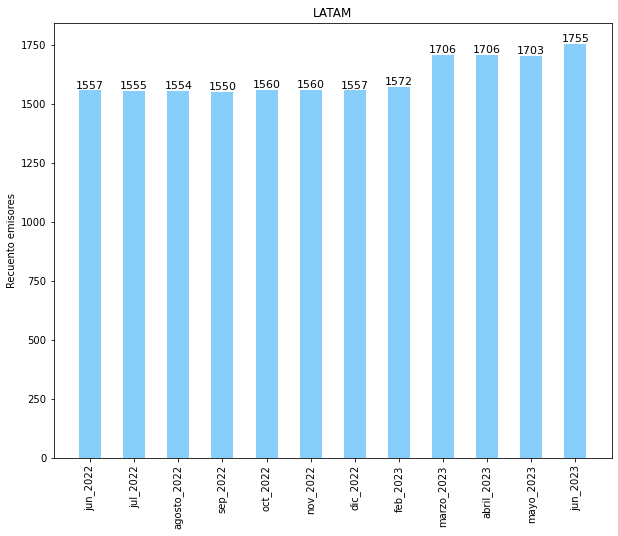

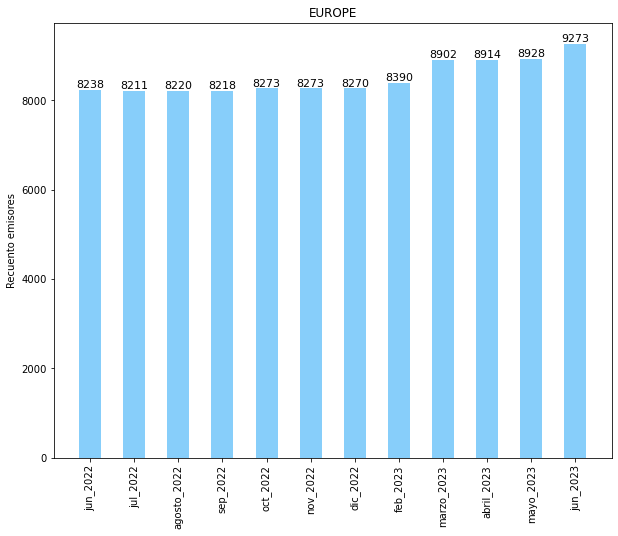

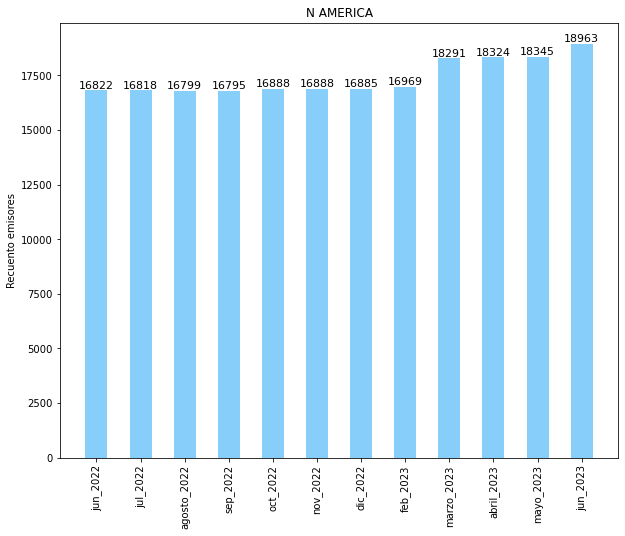

In [64]:
bar_plots_region(df_list_region) #Region

C:\Users\x867672\AppData\Local\Temp\ipykernel_11556\3808141996.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 8))


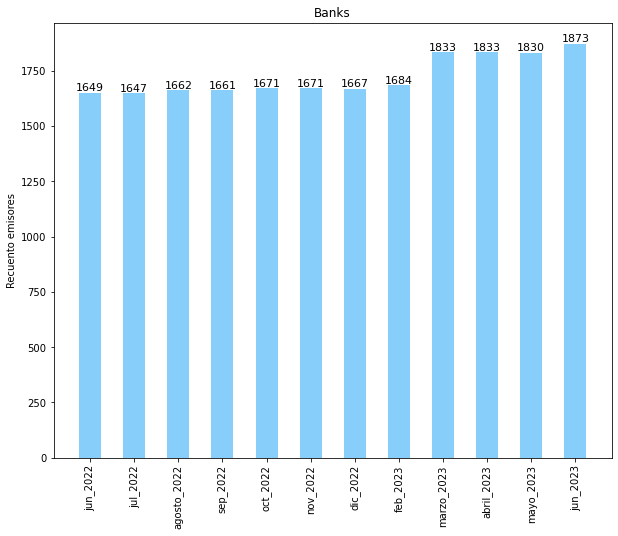

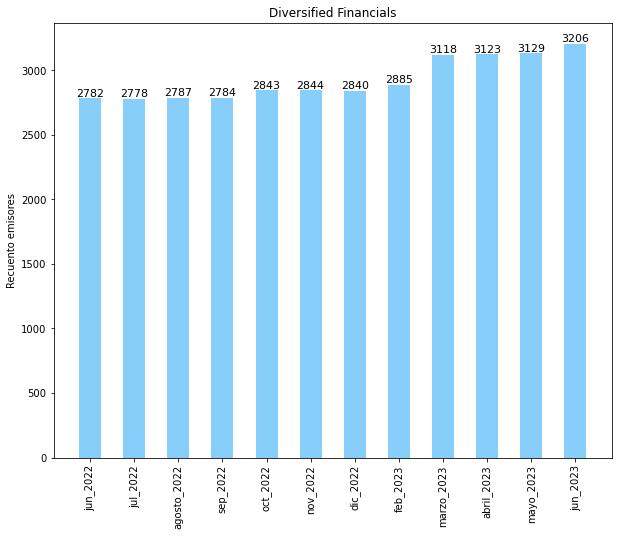

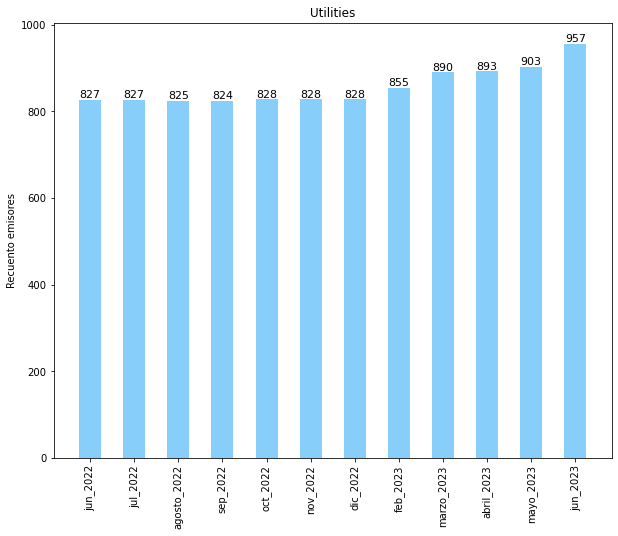

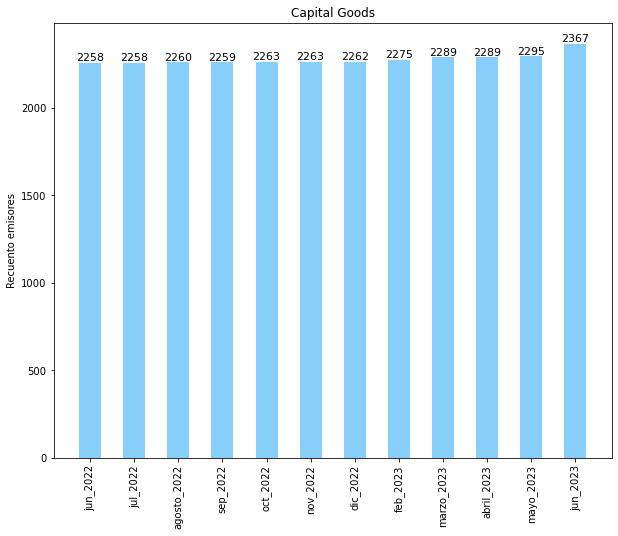

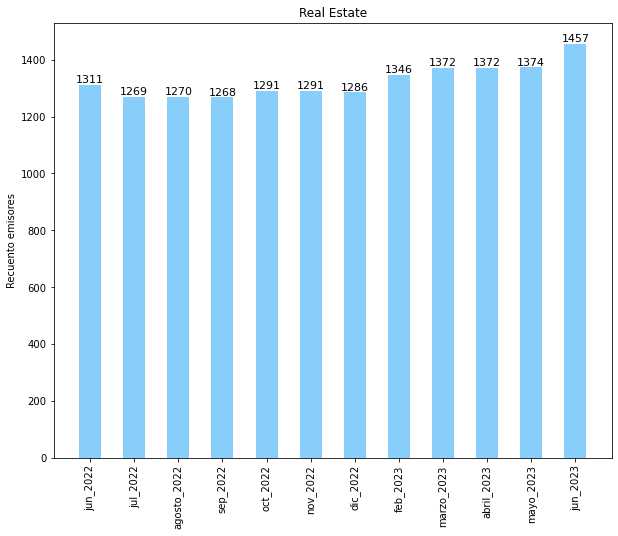

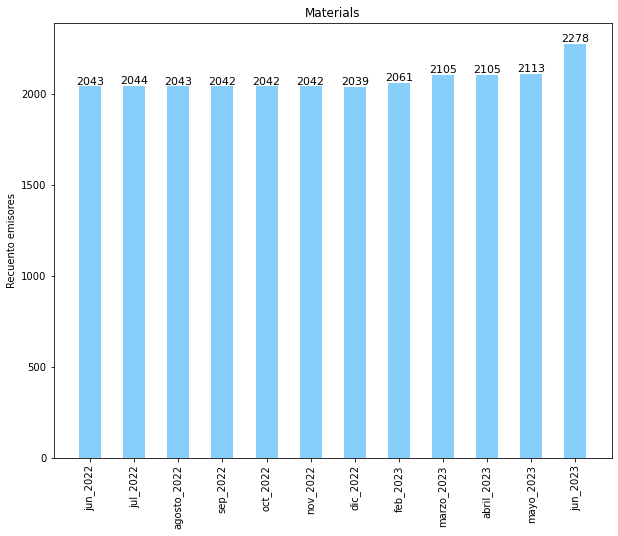

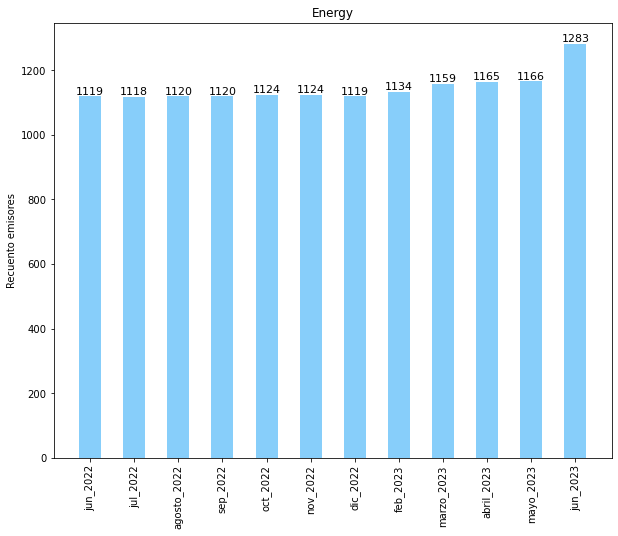

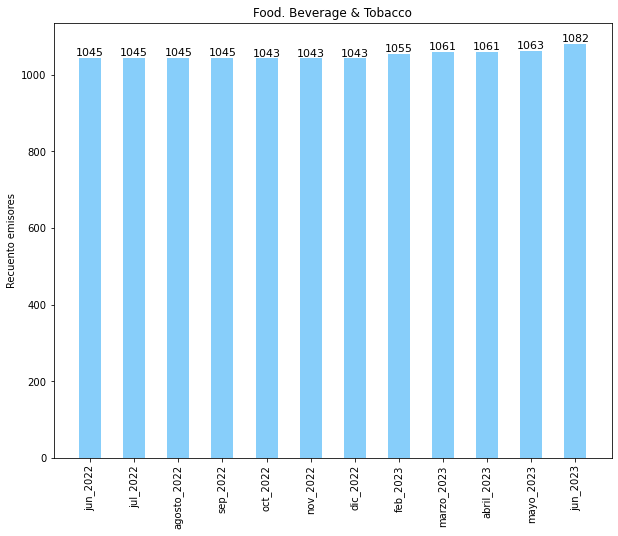

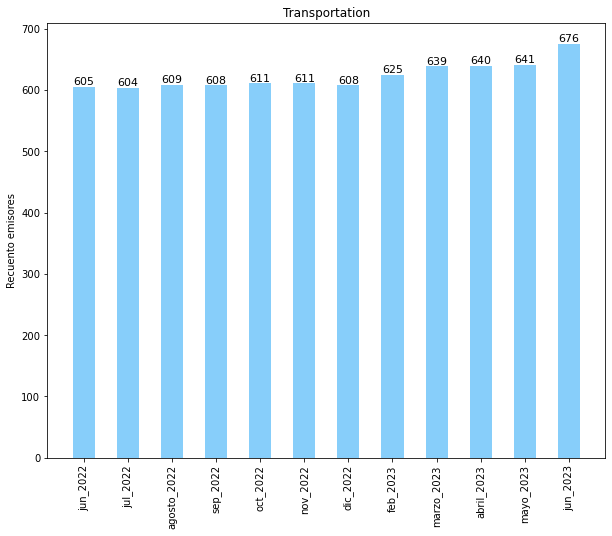

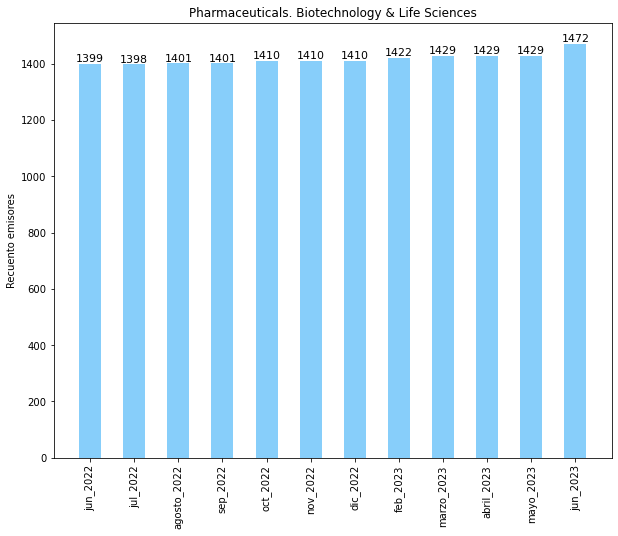

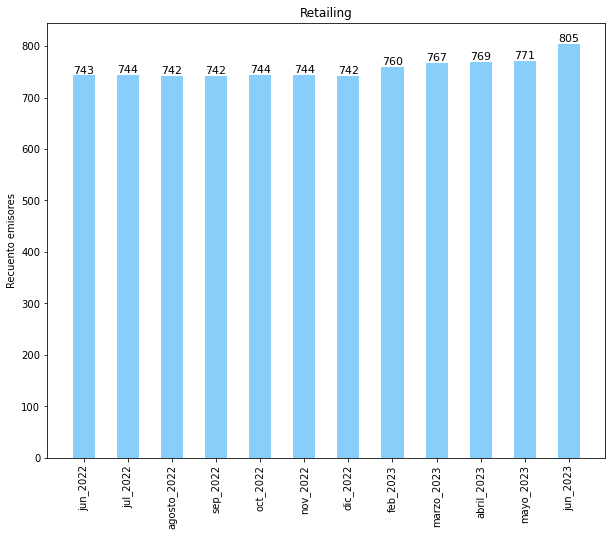

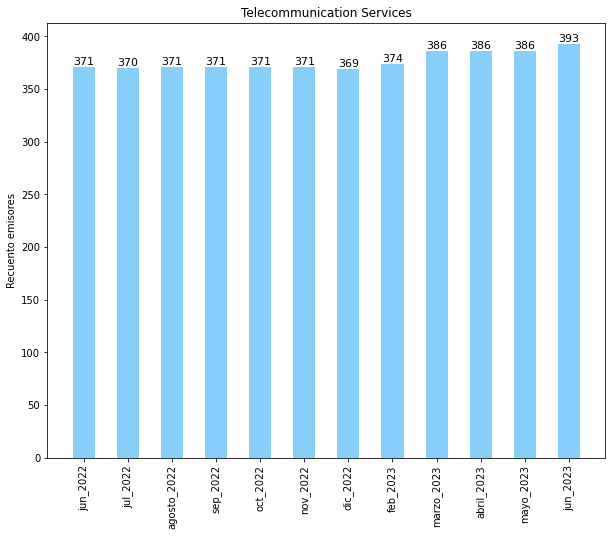

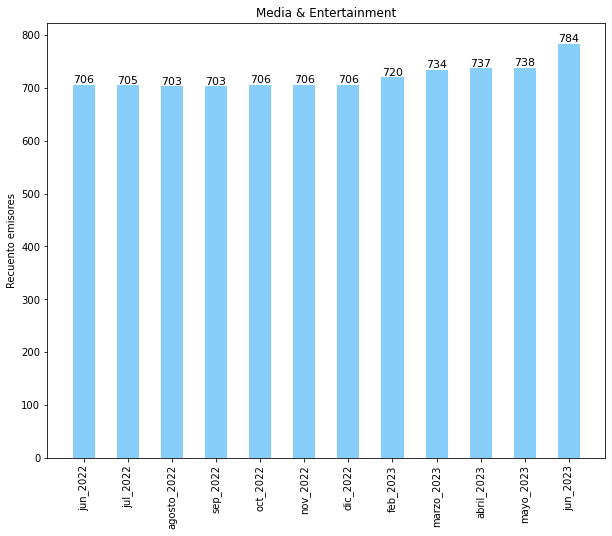

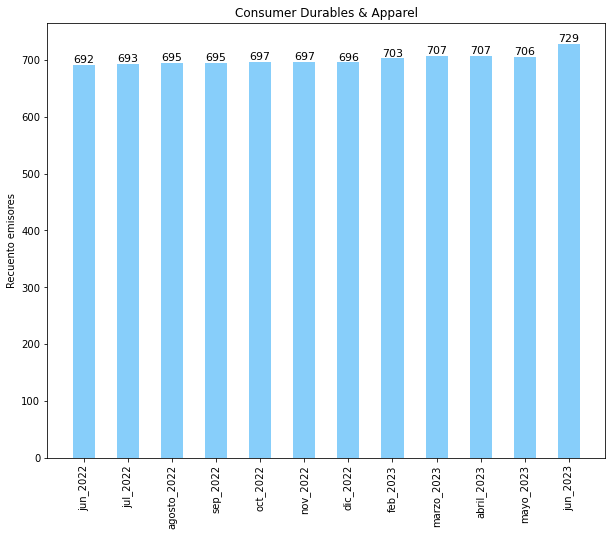

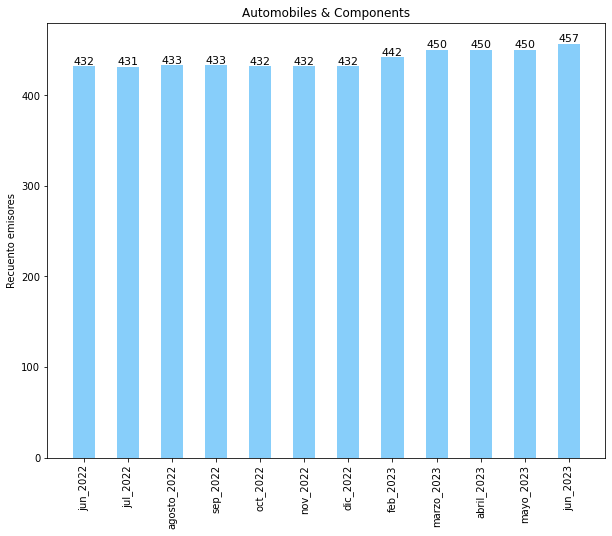

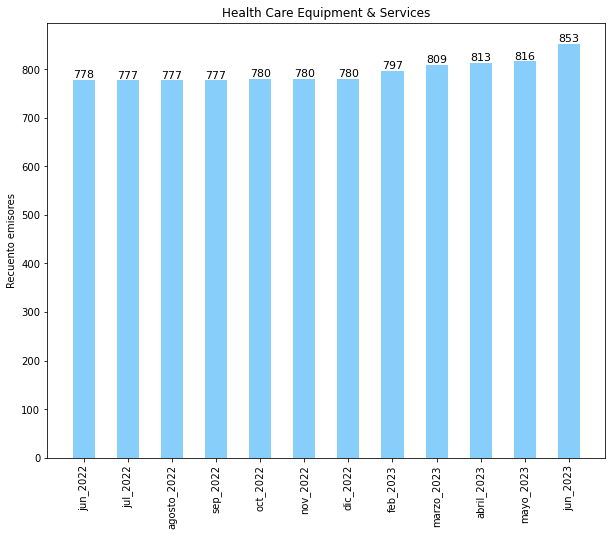

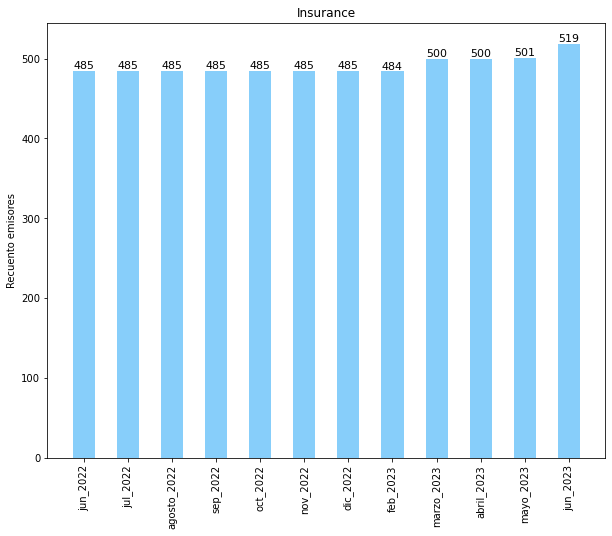

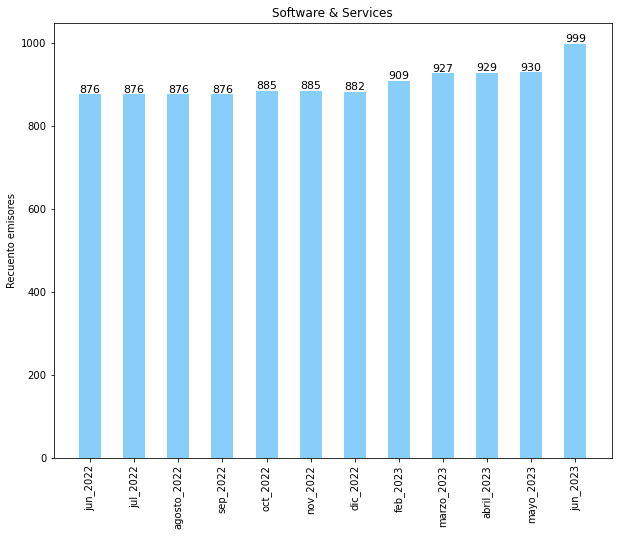

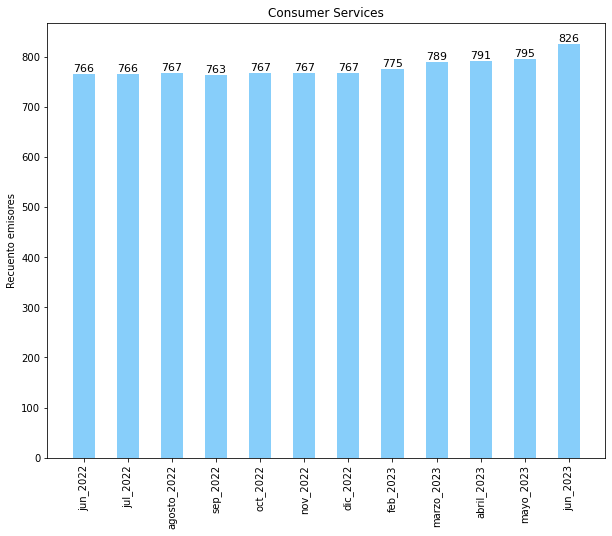

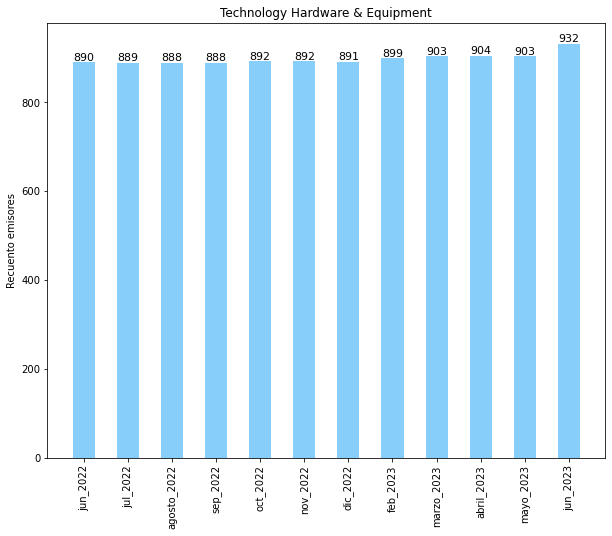

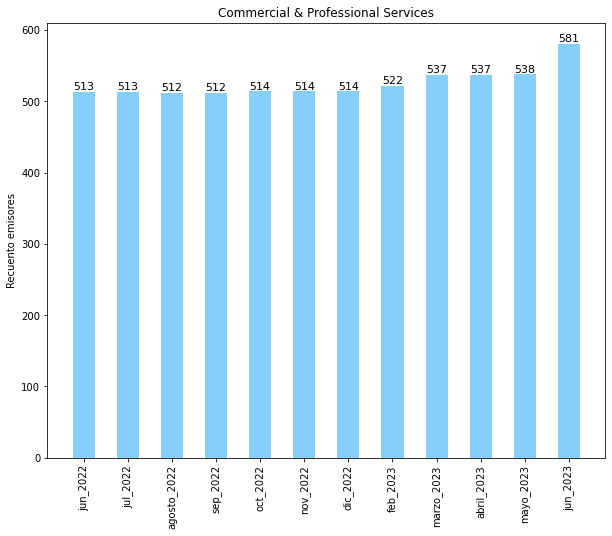

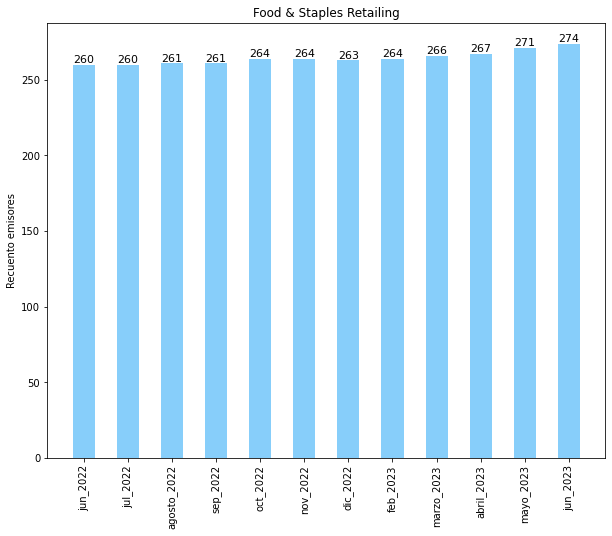

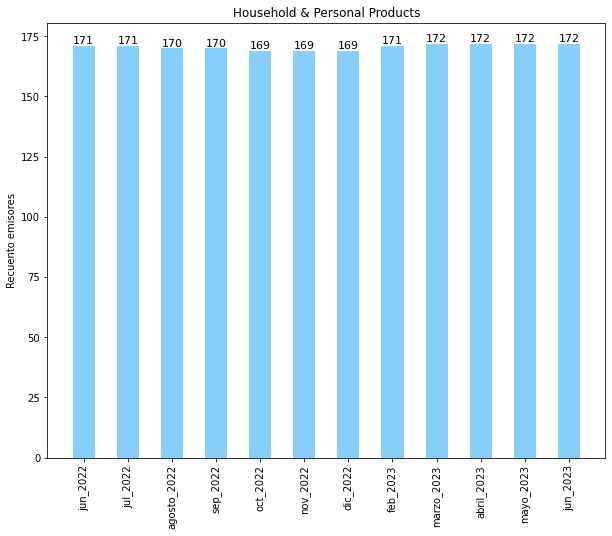

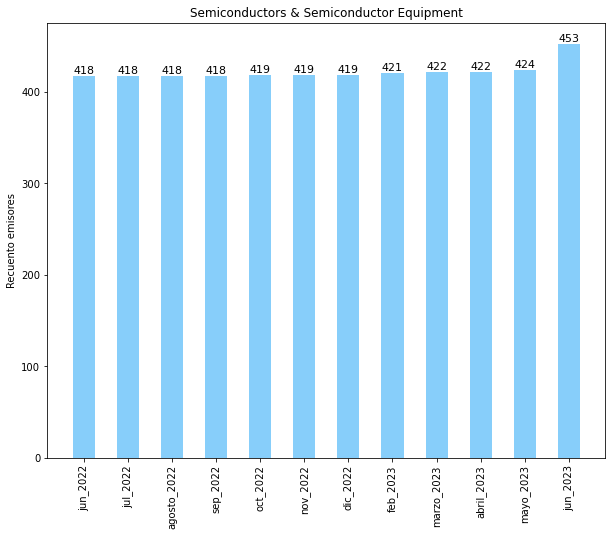

In [65]:
bar_plots_1(new_dfs) #Industrias

C:\Users\x867672\AppData\Local\Temp\ipykernel_11556\1945053252.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 8))


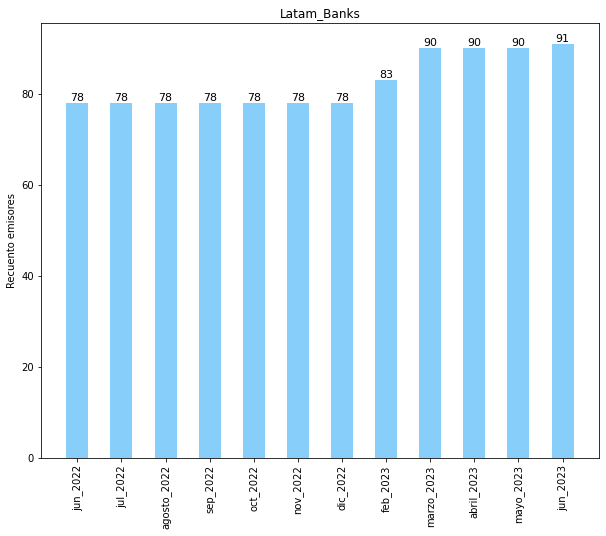

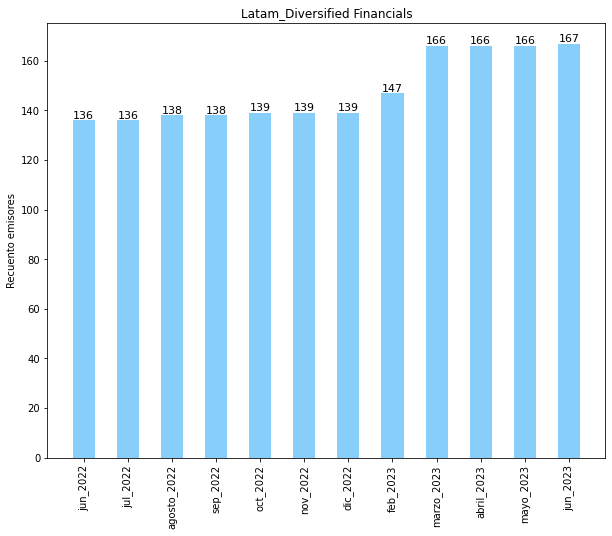

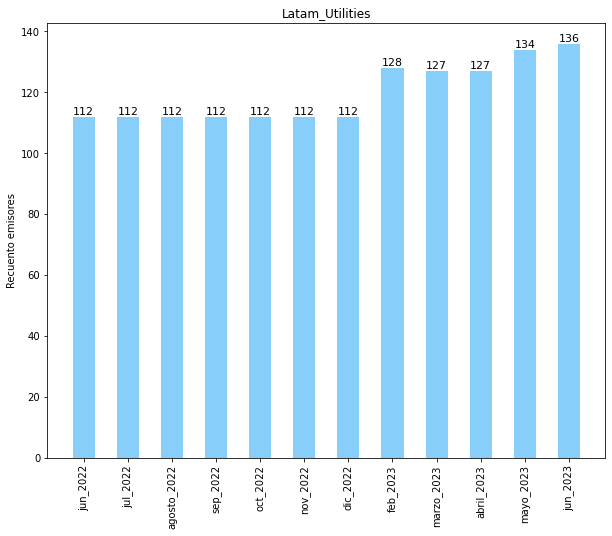

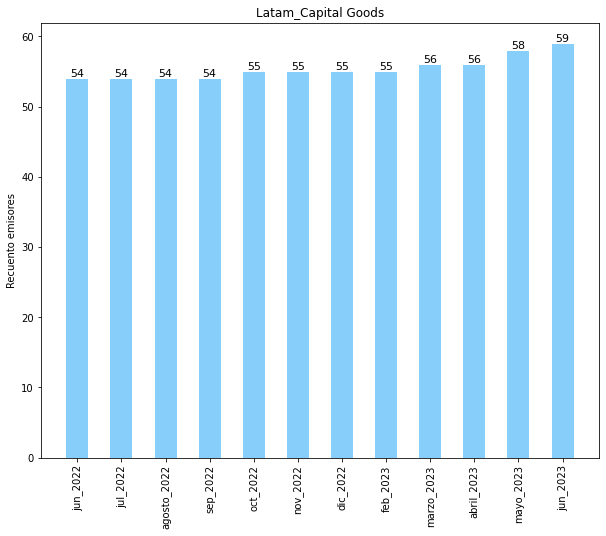

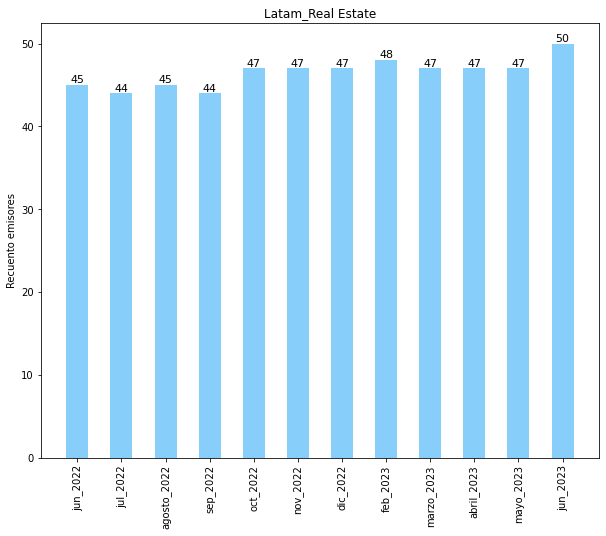

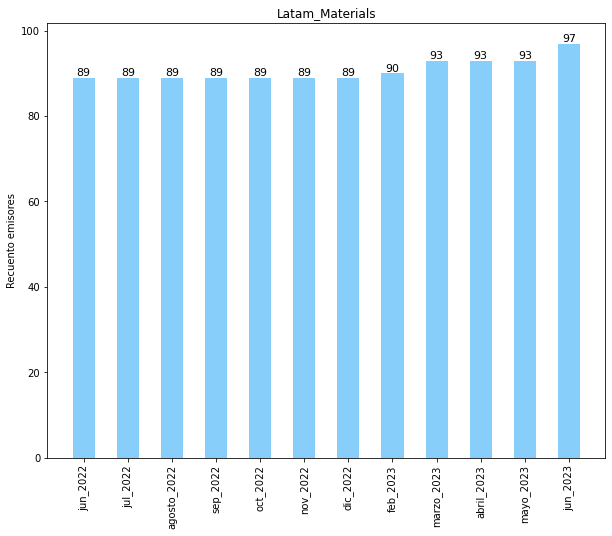

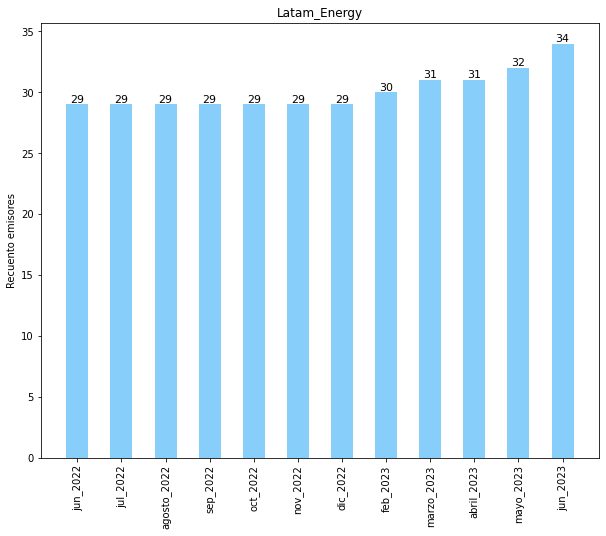

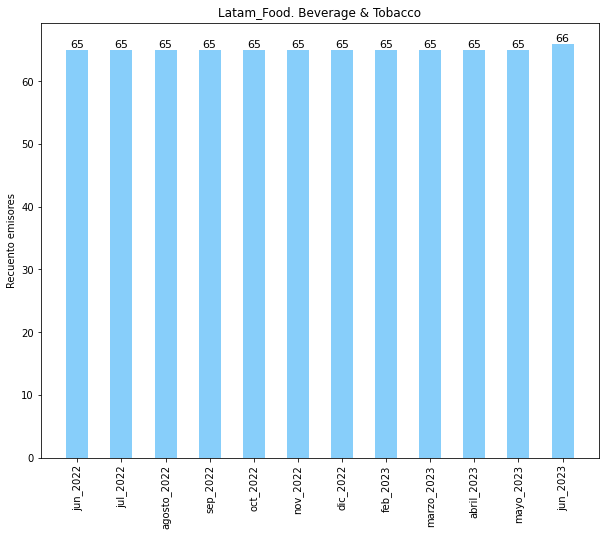

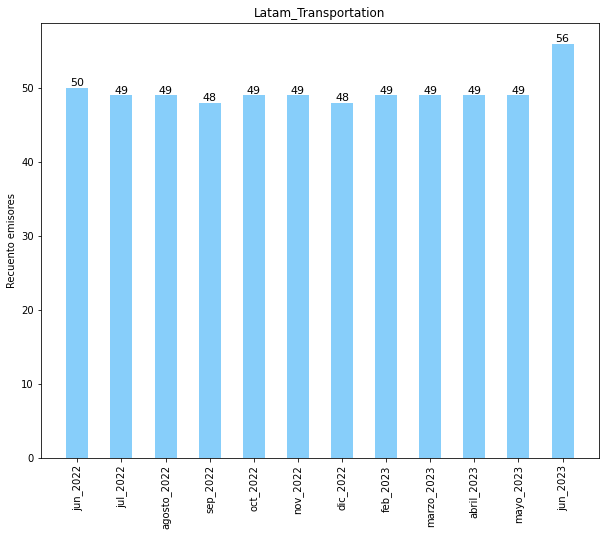

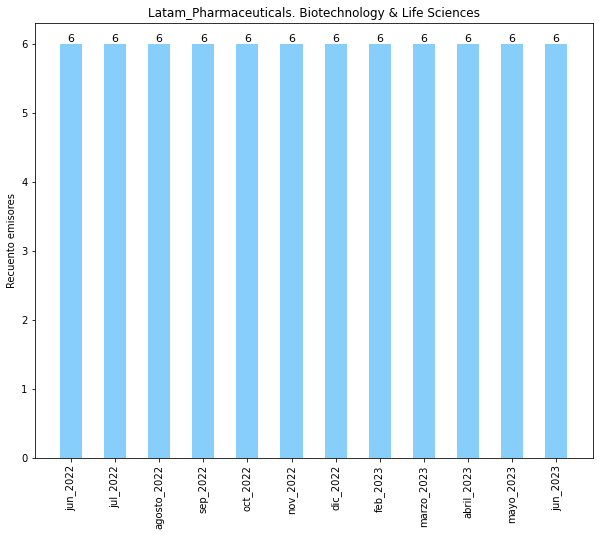

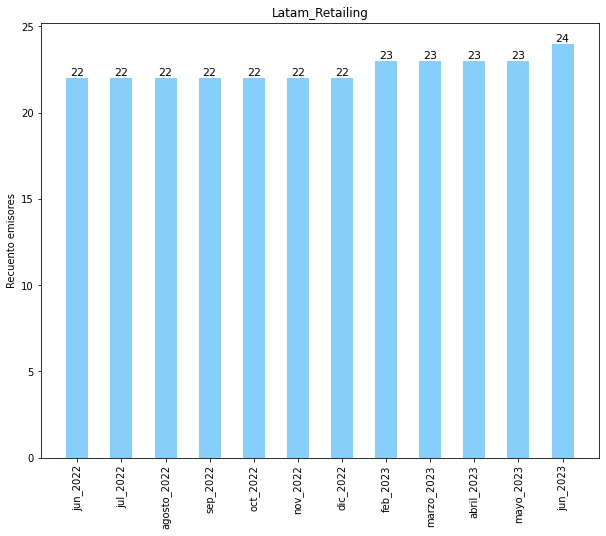

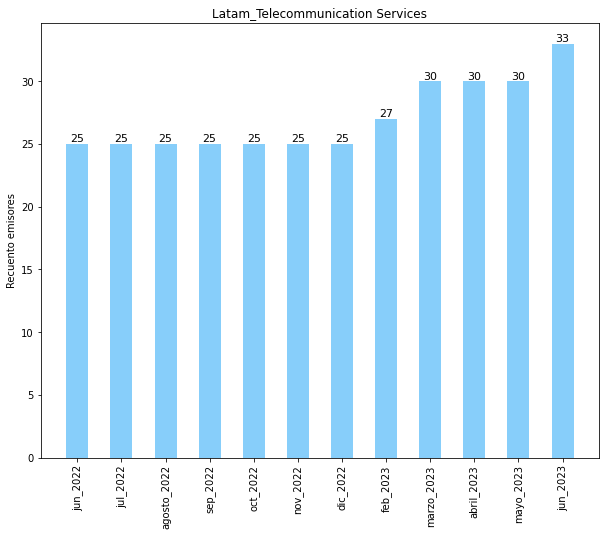

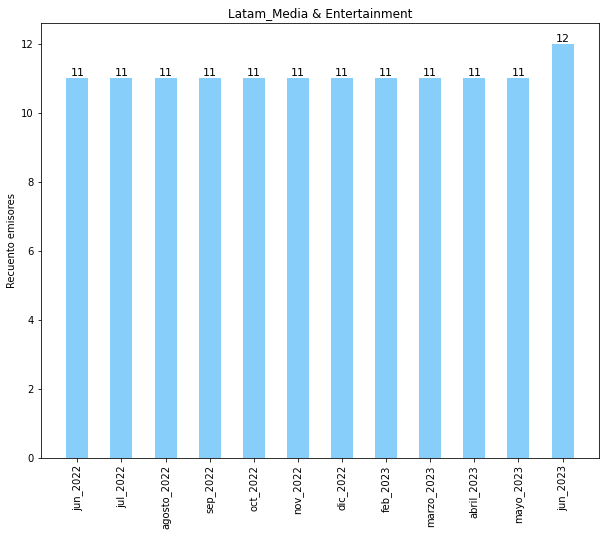

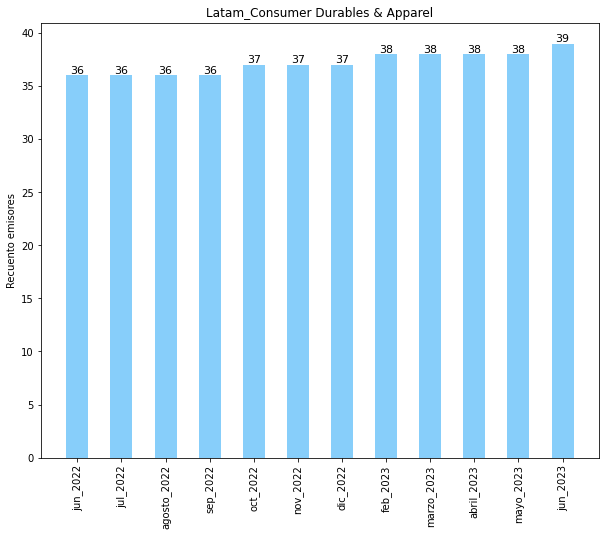

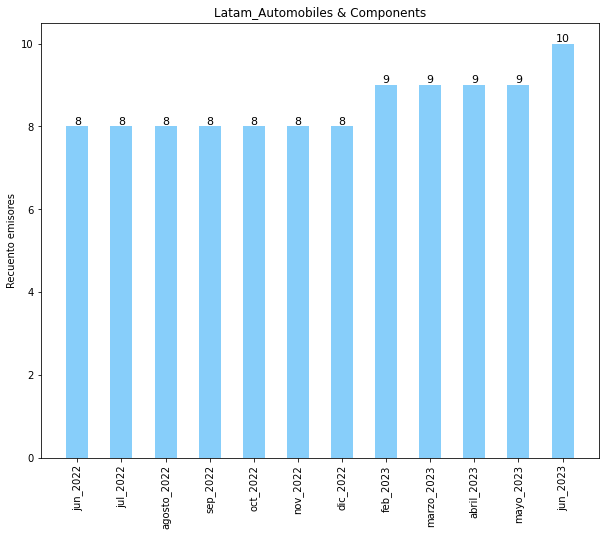

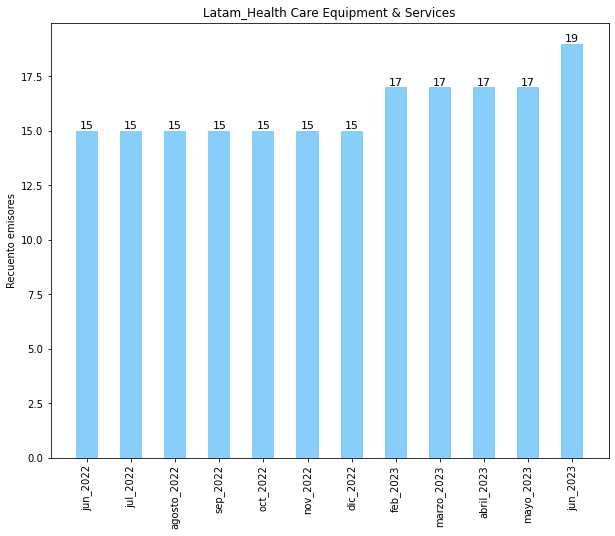

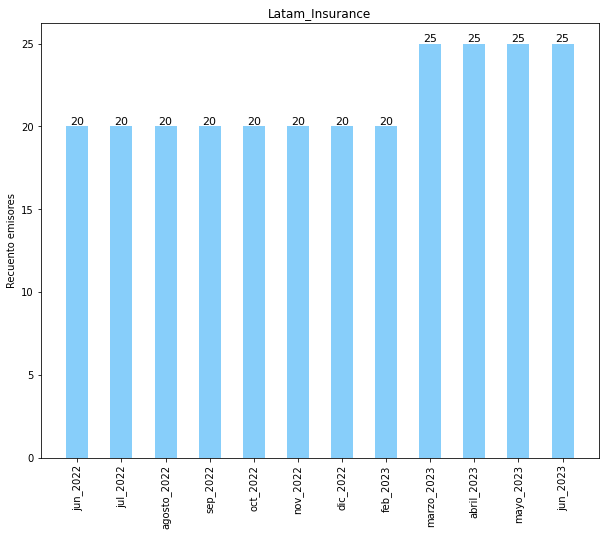

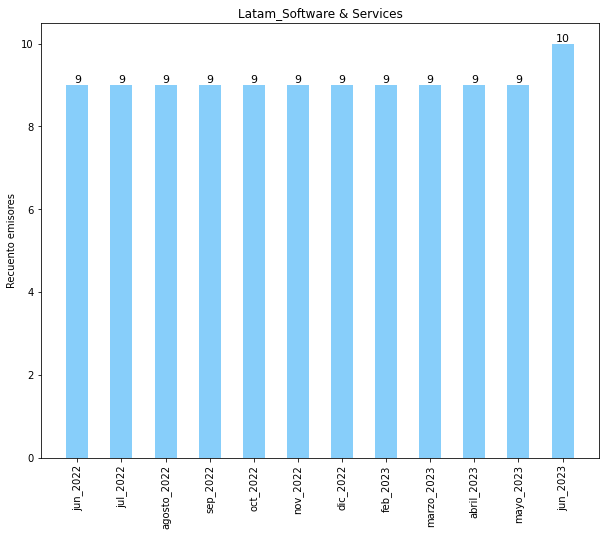

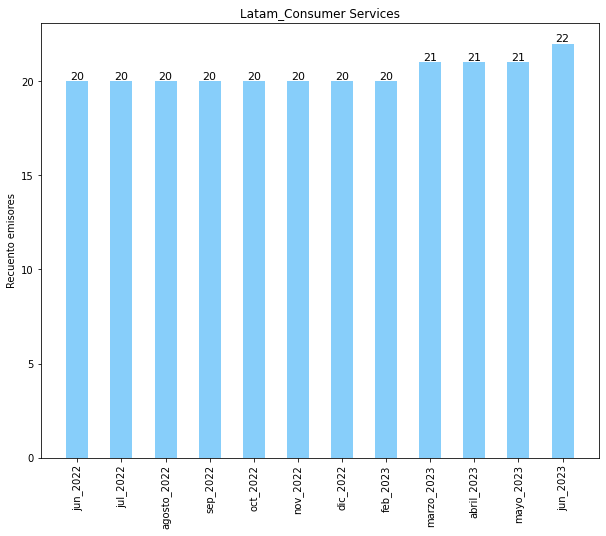

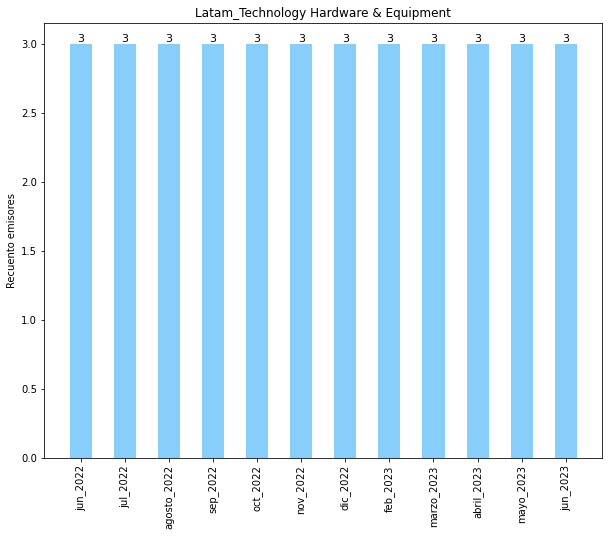

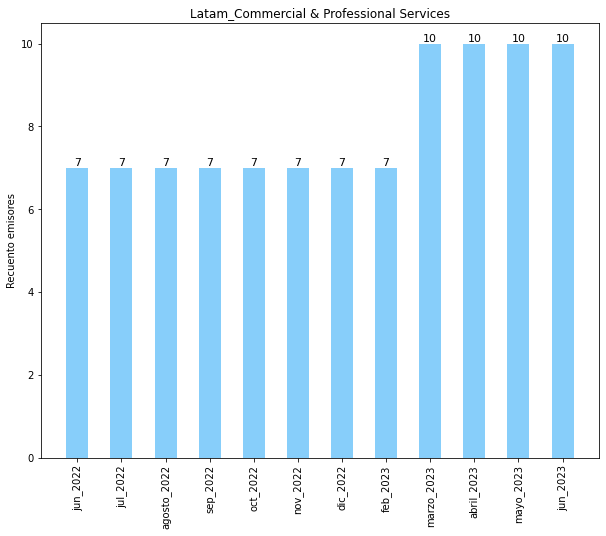

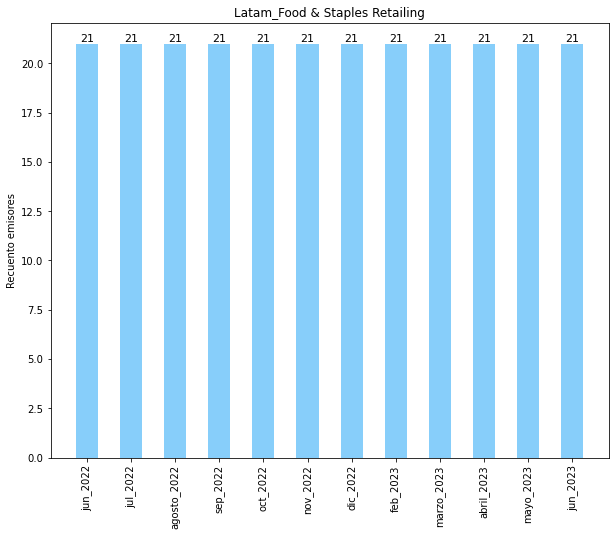

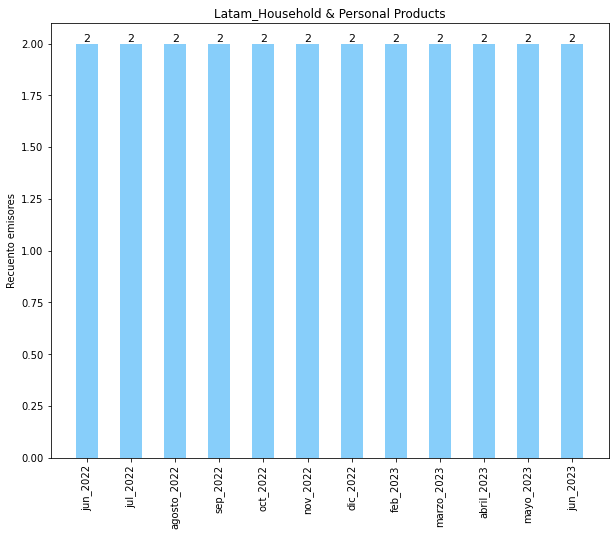

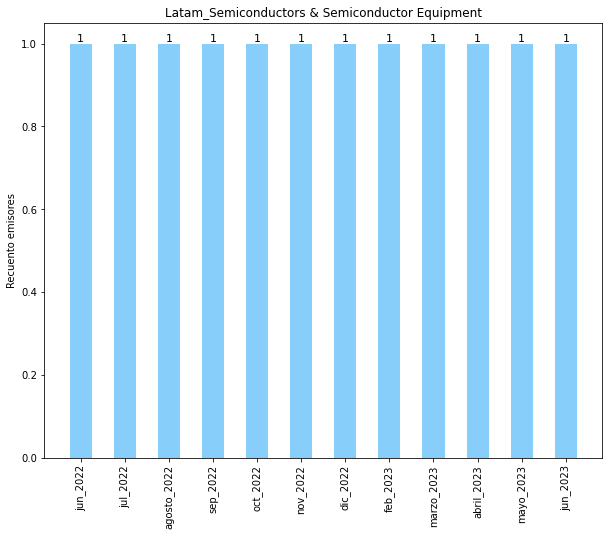

In [66]:
bar_plots_2(new_dfs_R_I_L) #Latam_vs_ind

C:\Users\x867672\AppData\Local\Temp\ipykernel_11556\3809262397.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 8))


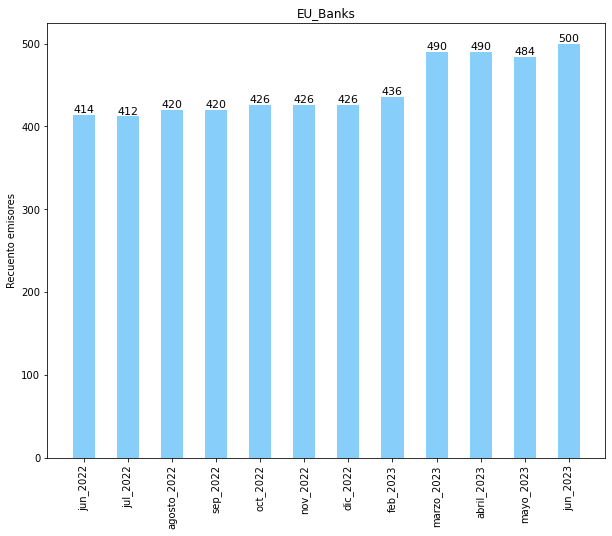

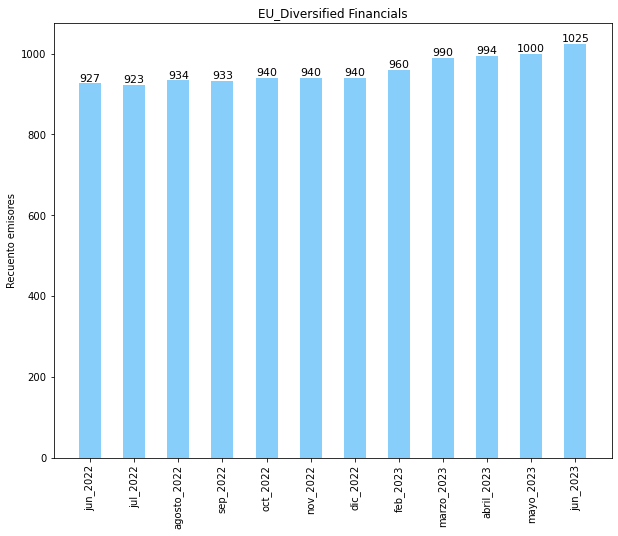

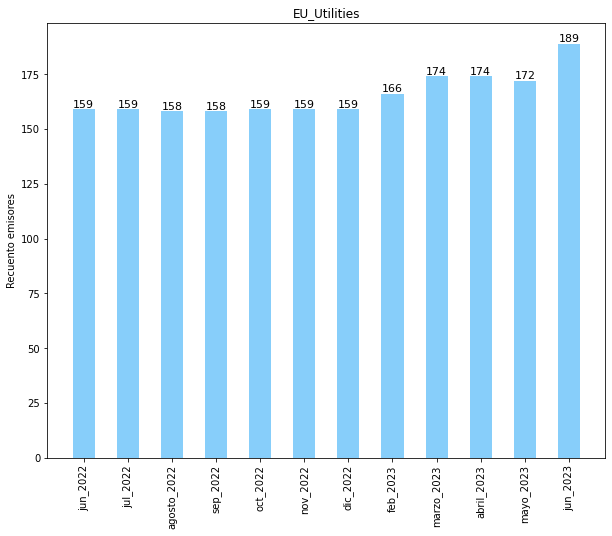

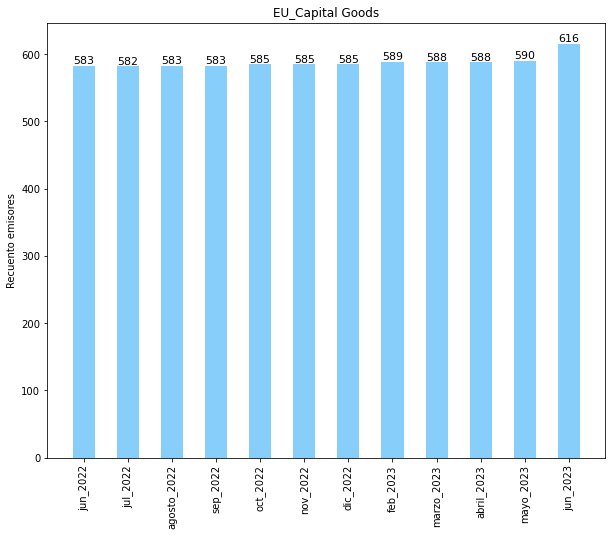

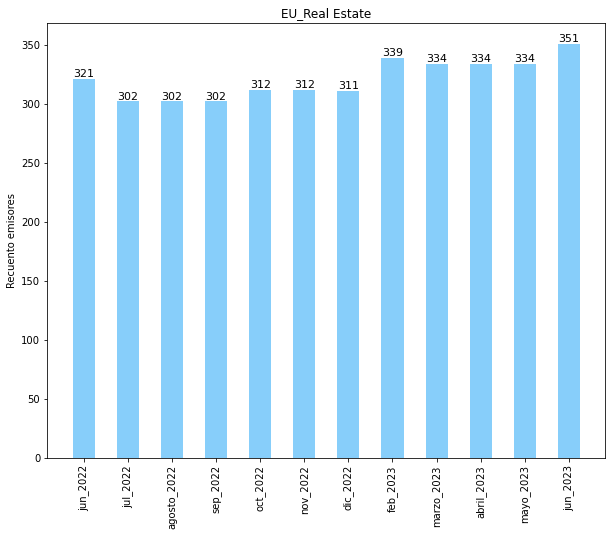

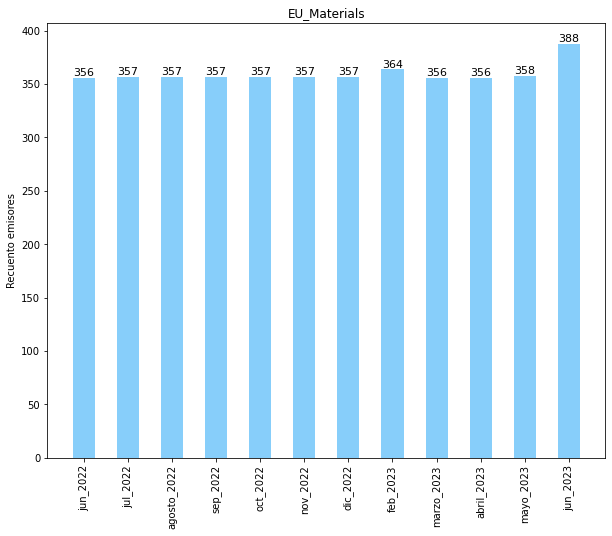

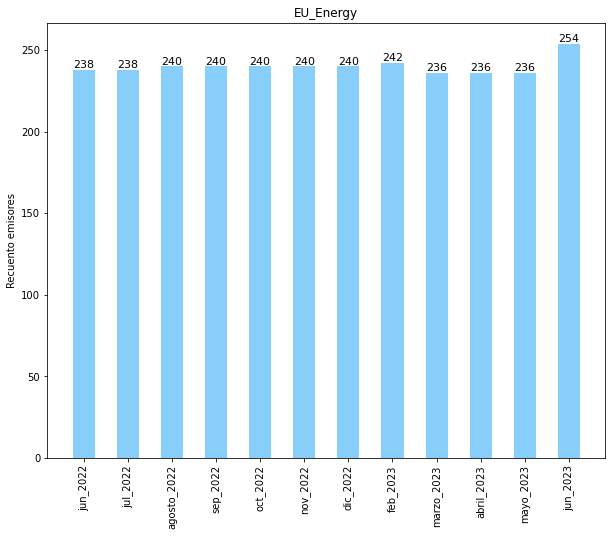

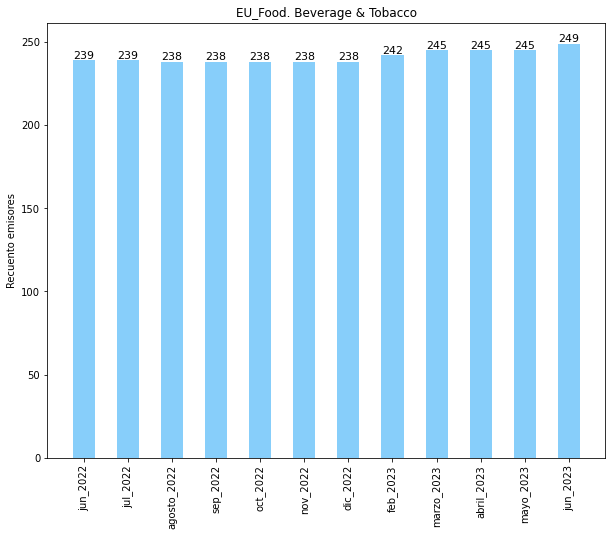

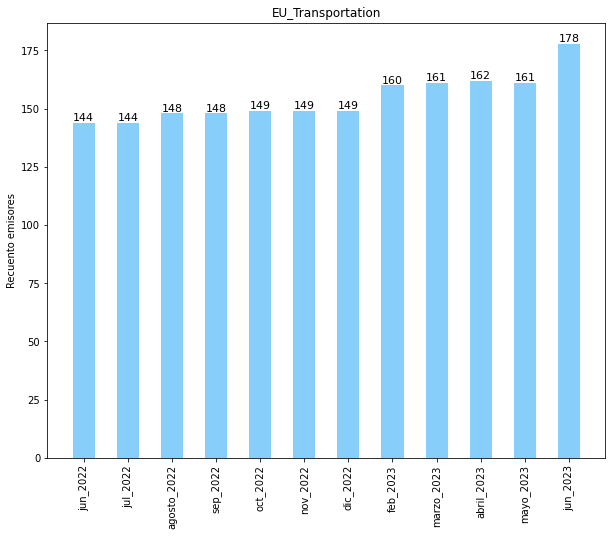

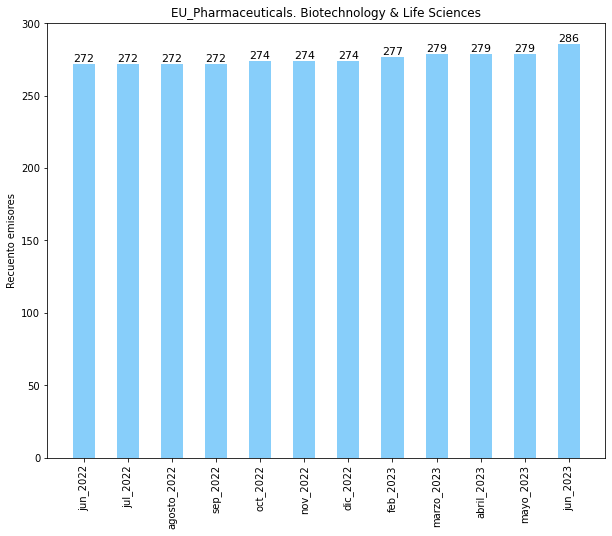

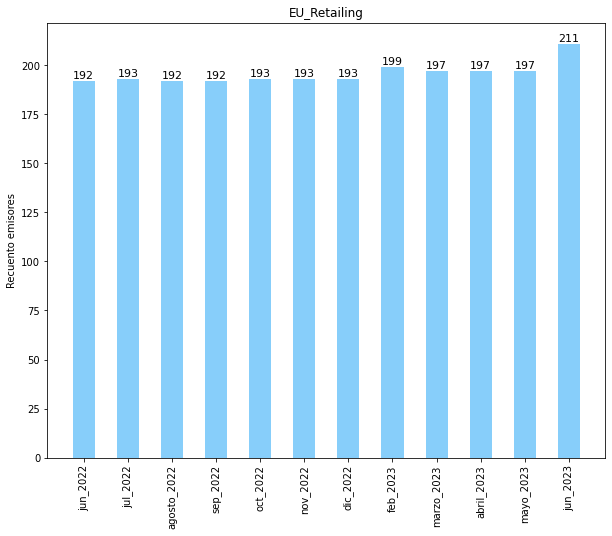

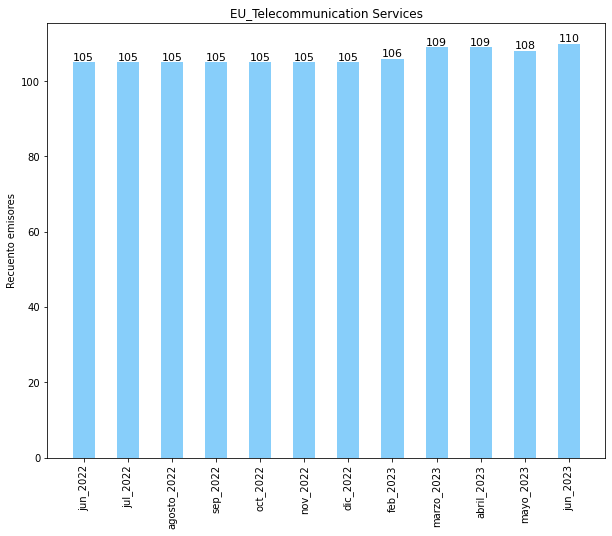

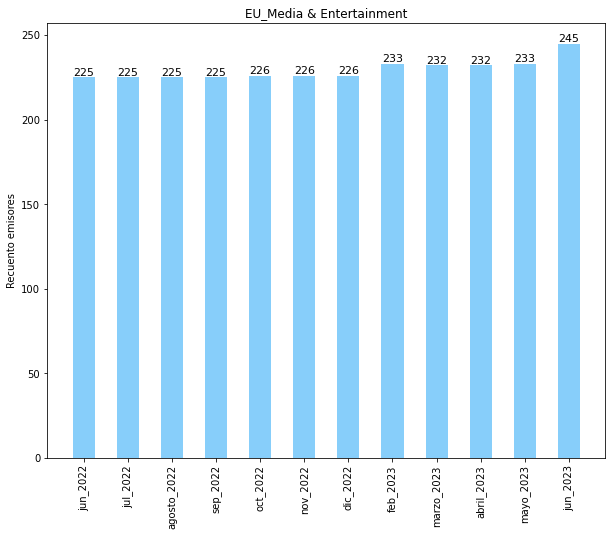

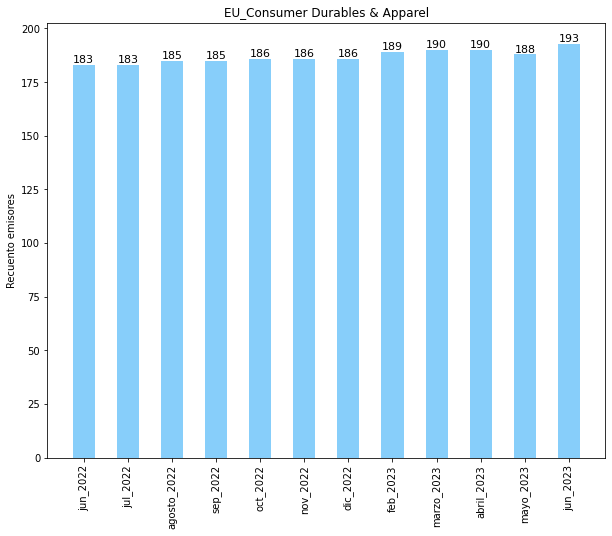

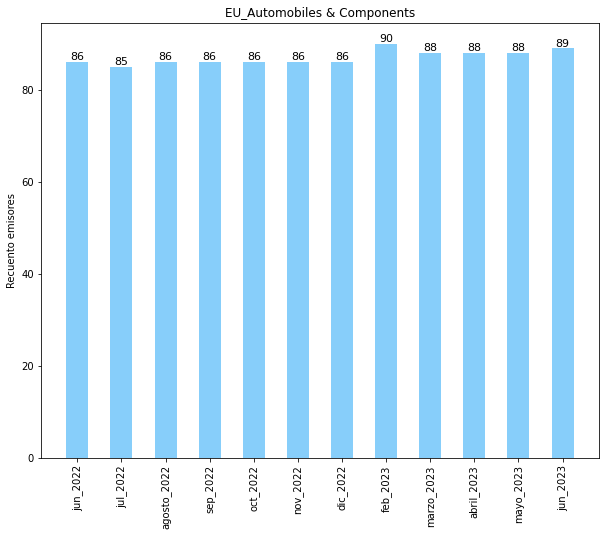

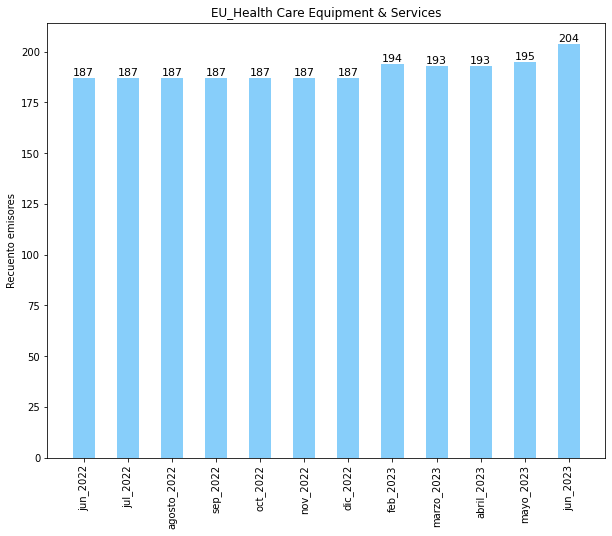

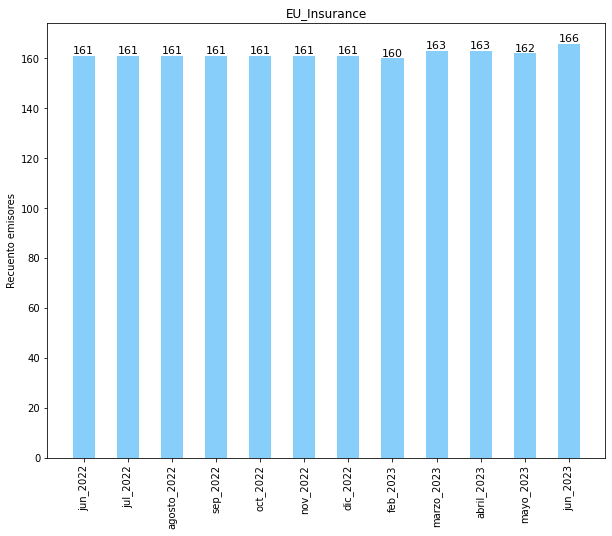

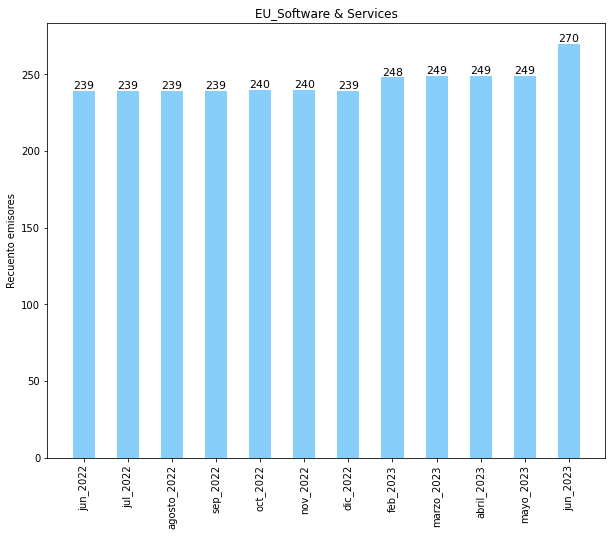

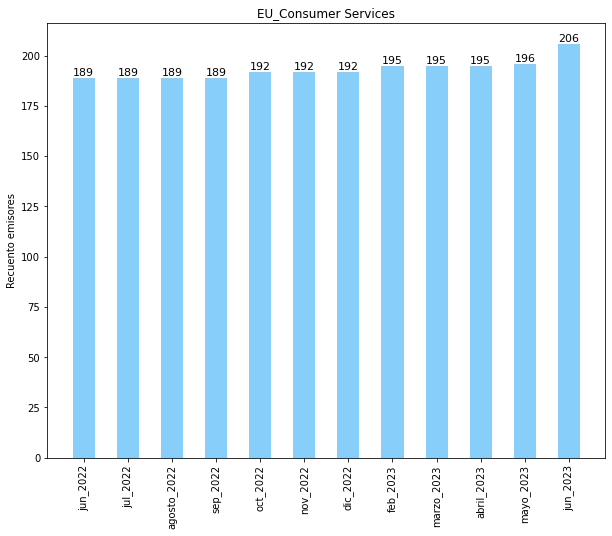

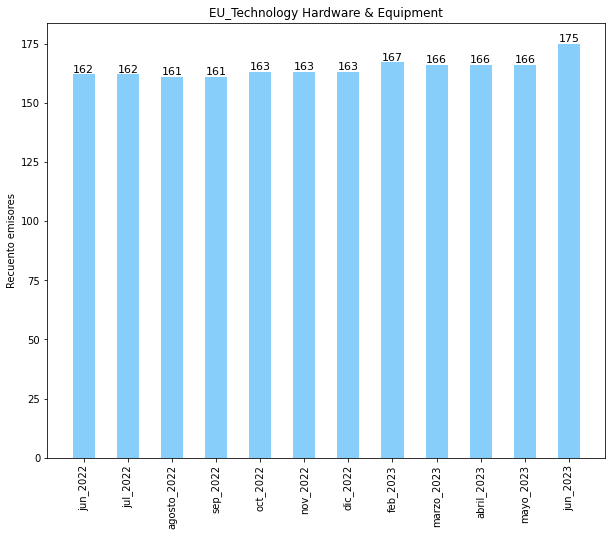

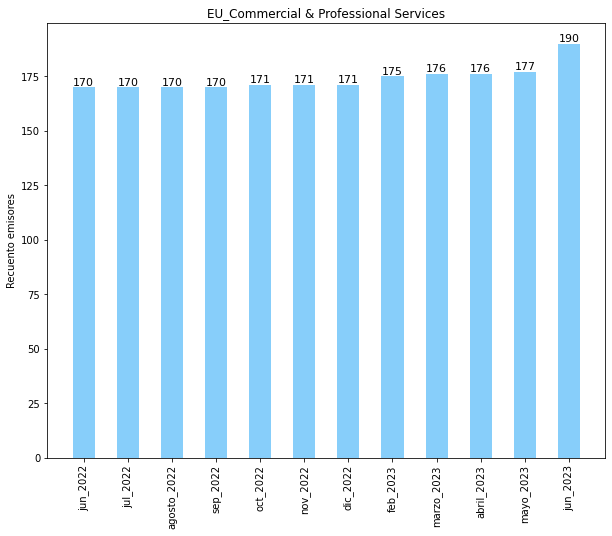

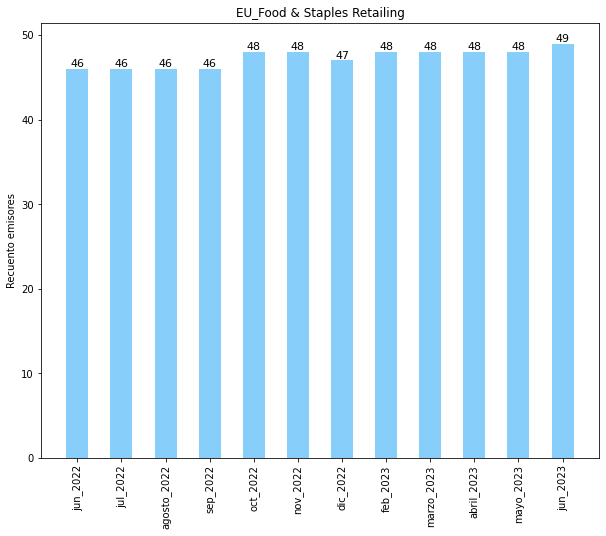

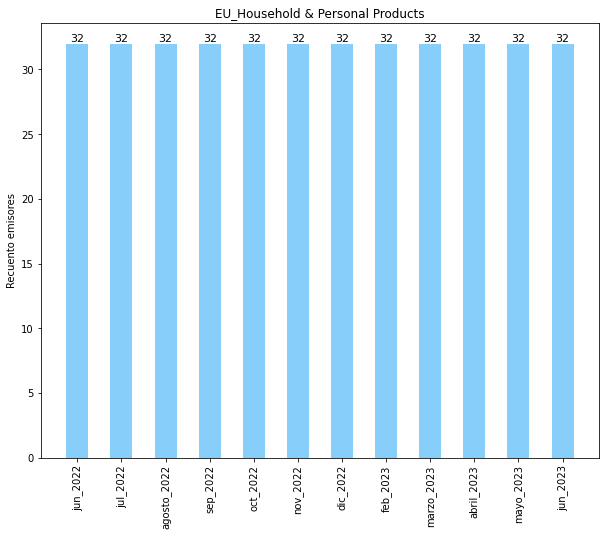

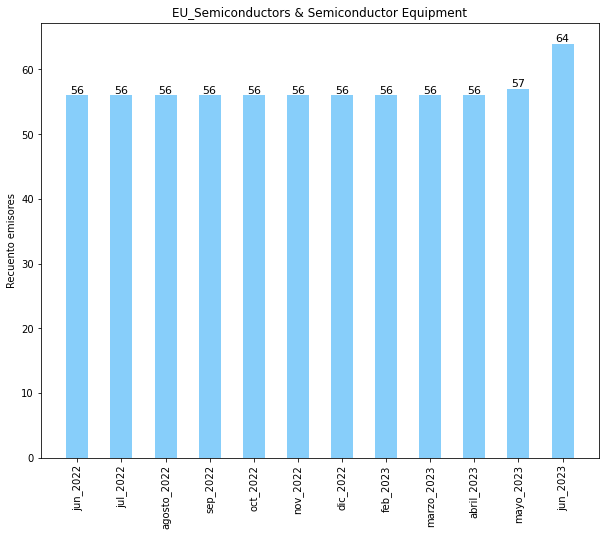

In [67]:
bar_plots_3(new_dfs_R_I_EU) #EU_vs_Ind

C:\Users\x867672\AppData\Local\Temp\ipykernel_11556\511898606.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10, 8))


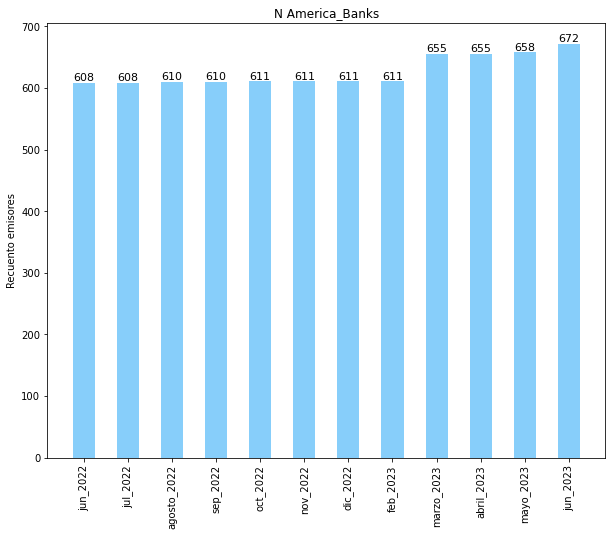

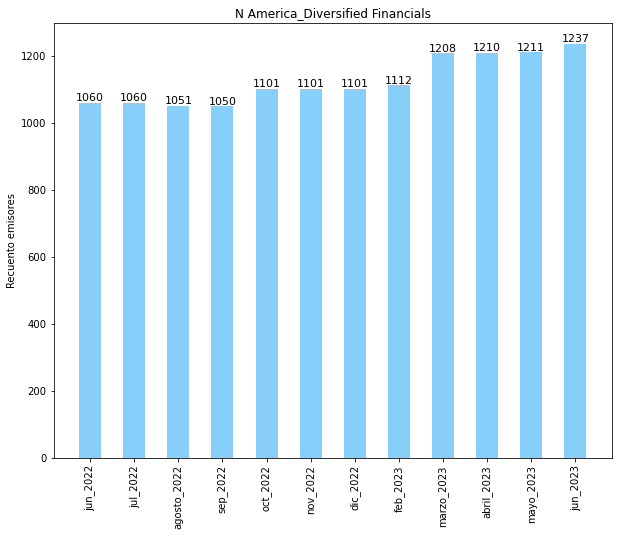

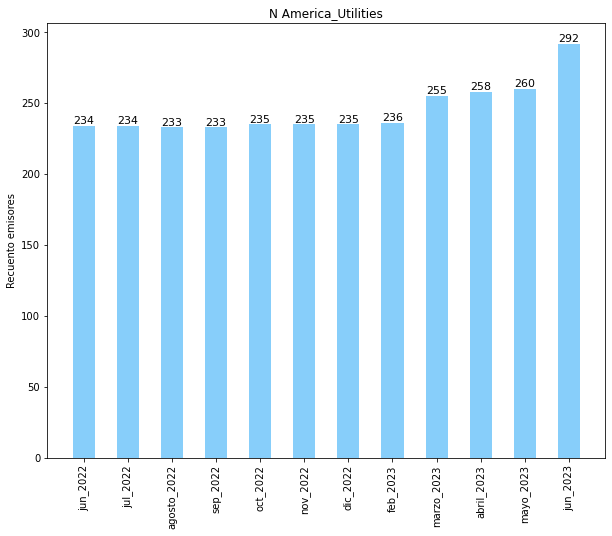

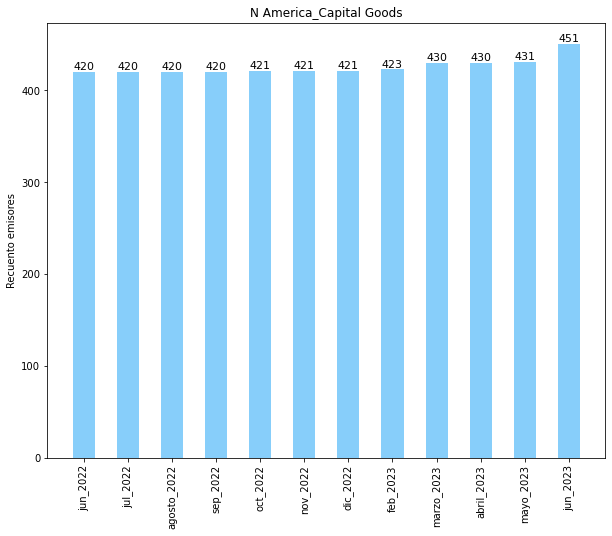

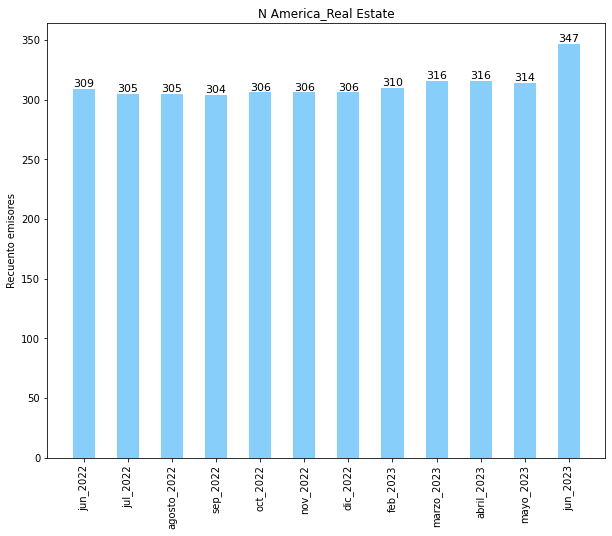

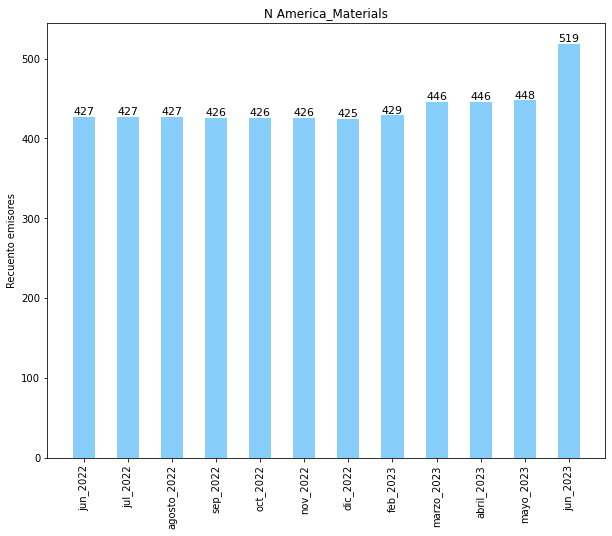

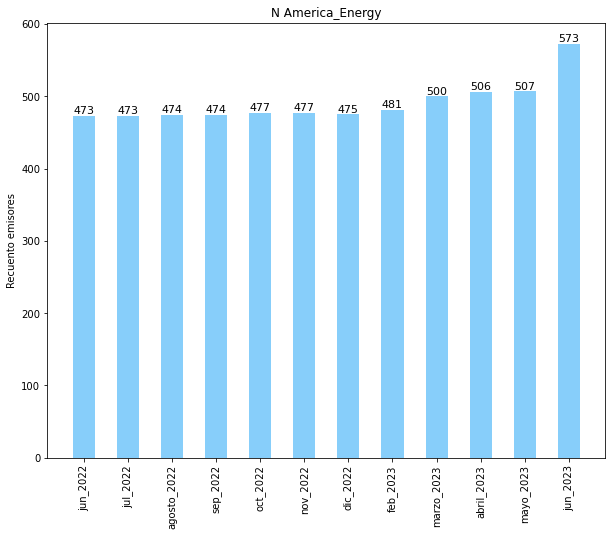

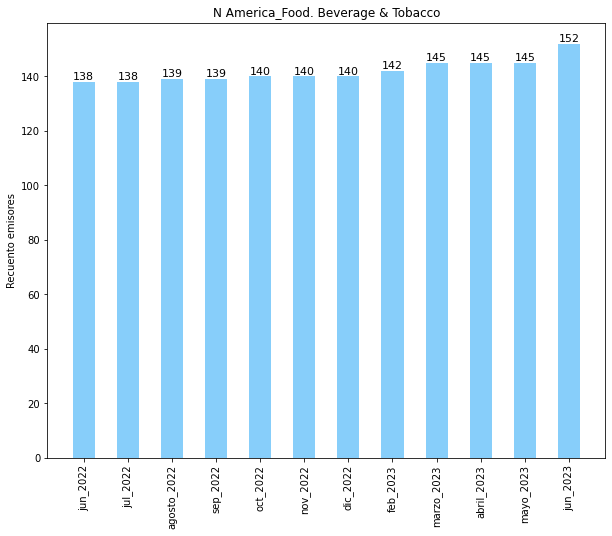

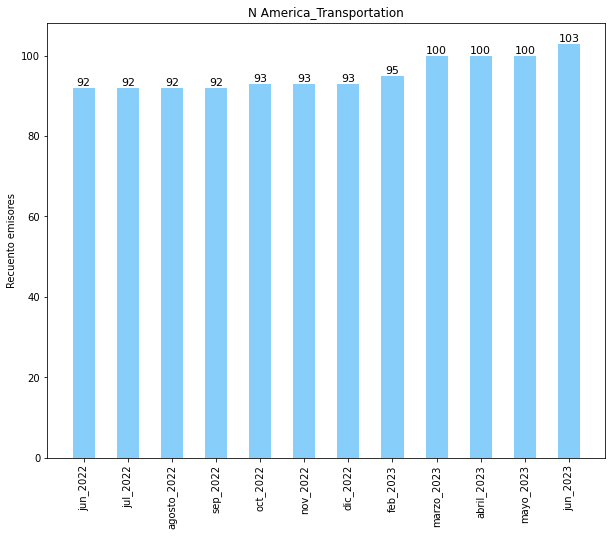

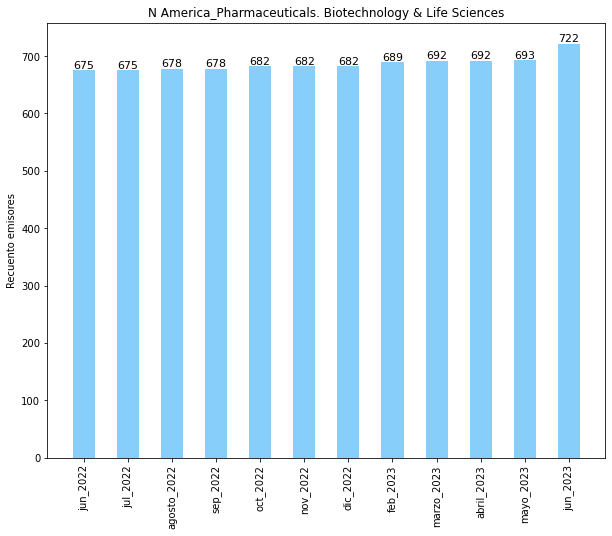

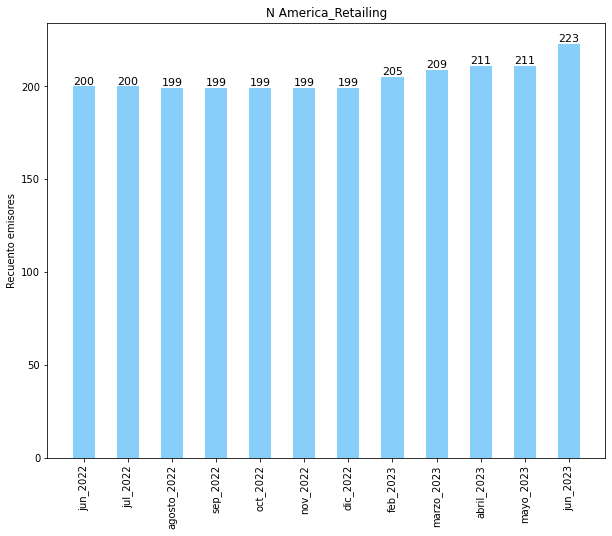

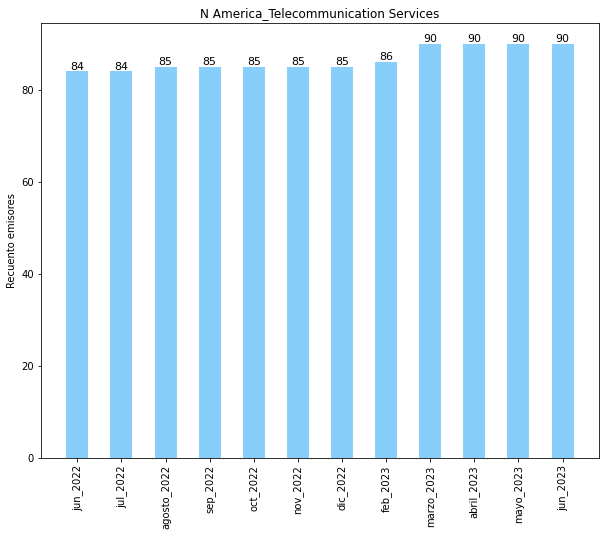

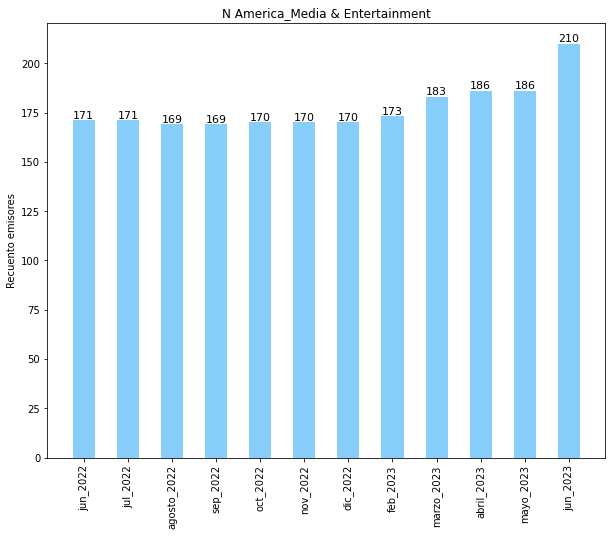

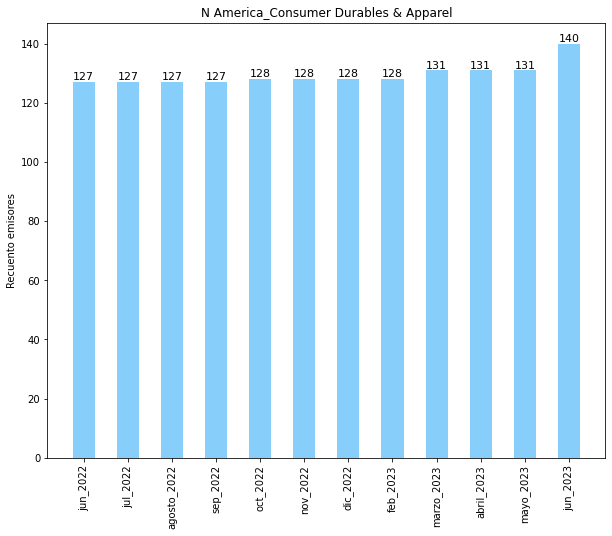

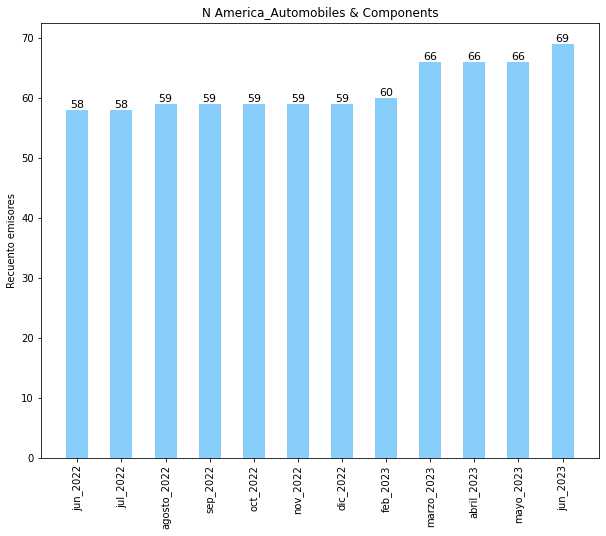

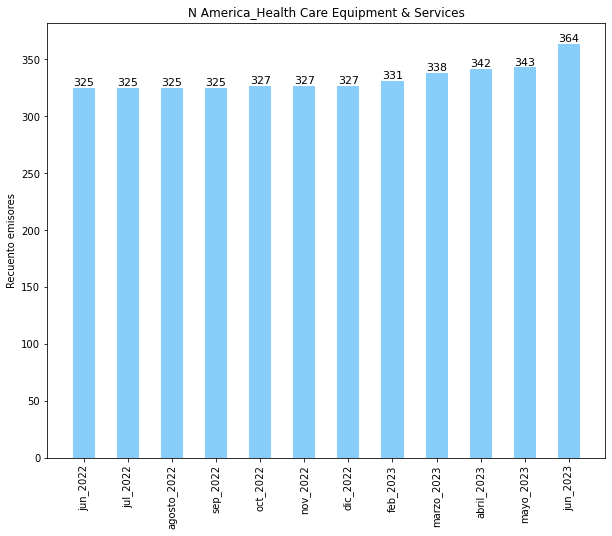

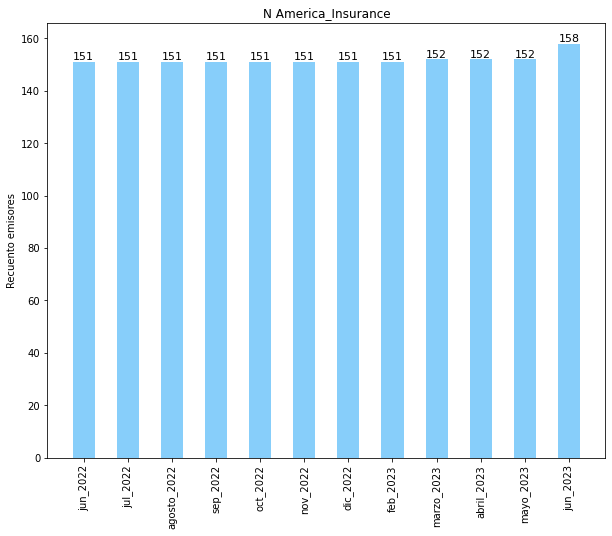

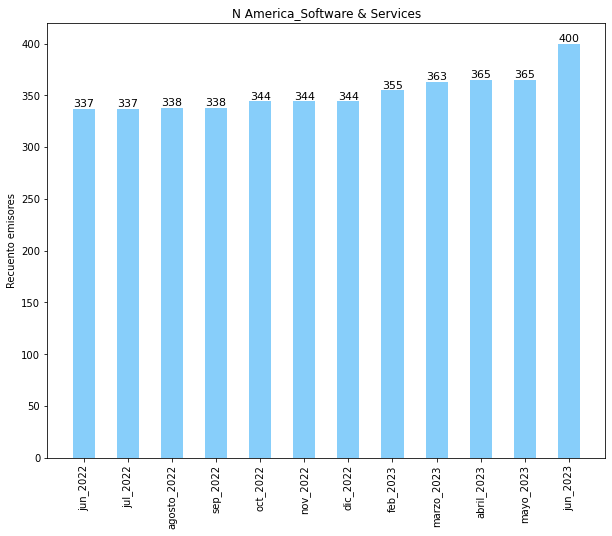

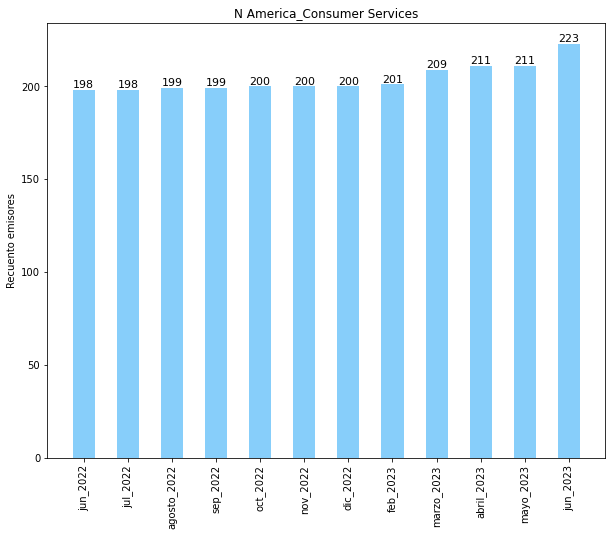

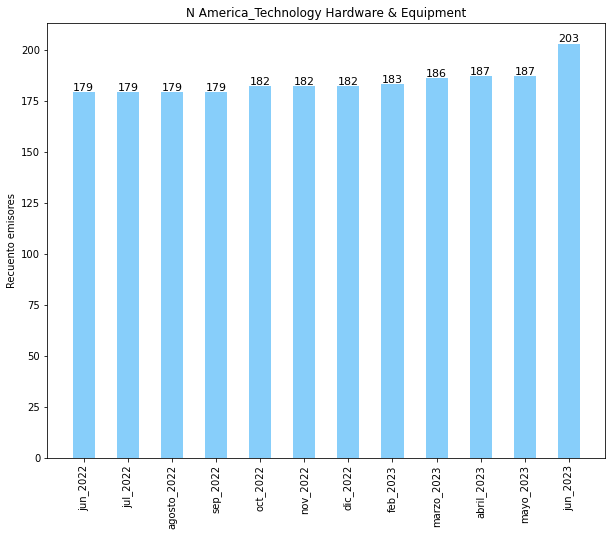

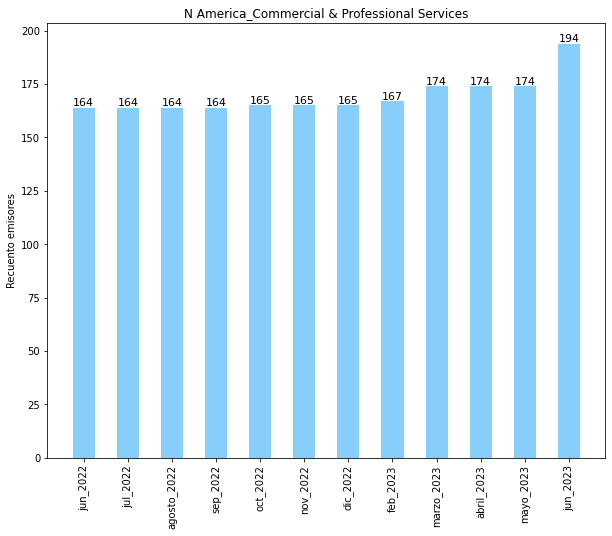

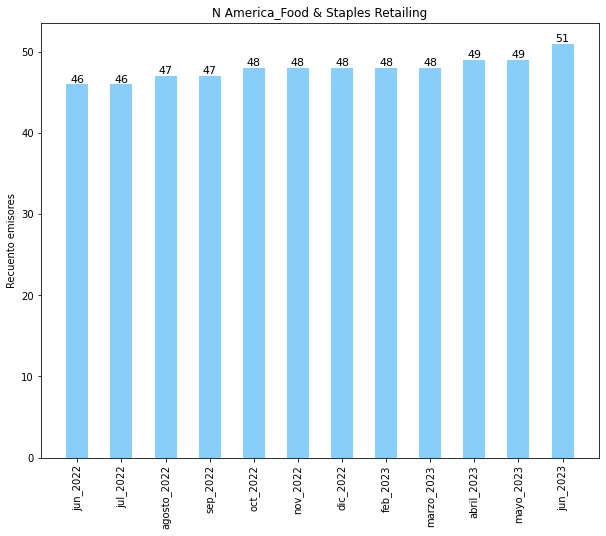

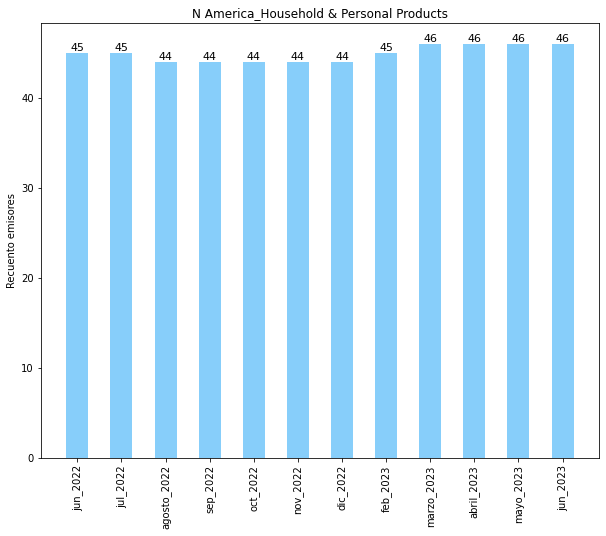

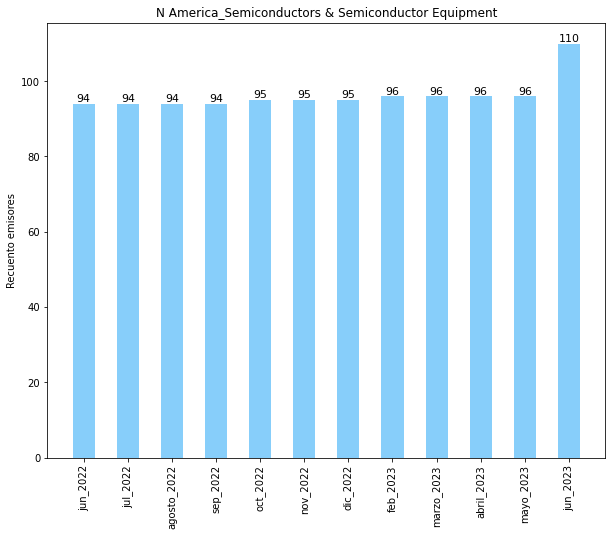

In [68]:
bar_plots_4(new_dfs_R_I_USA) #N_Am_vs_Ind

# 16

## Run All, luego de los 15 primeros cambios 